# BLE Proximity Experiment - Random Forest Classifier
## Experiment based on the measurements of the BLE RSSI values according to the distance to the BLE Estimote beacon

### Imports
Imports of required libraries

In [1]:
#CSV Related
import pandas as pd
import csv

# Machine Learning
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.pipeline import make_pipeline
import sklearn
import scipy

#Graphical Display
%matplotlib inline
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.despine()
from pandas.plotting import scatter_matrix

plt.style.use('seaborn-whitegrid')

#Additional Helper Libraries
from operator import itemgetter
import re

<Figure size 432x288 with 0 Axes>

### Load File
Function that allows to load a file from disk

In [2]:
#Function that reads a csv file and structures the data accordingly
def load_file(filename):
    dataset = pd.read_csv(filename)
    return dataset

### Replace 0 with Nan RSSI Values

In [3]:
def replace_features_nan(dataset):
    dataset['rssi_Value'] = dataset['rssi_Value'].replace(0,np.nan)
    dataset['rolling_mean_rssi'] = dataset['rolling_mean_rssi'].replace(0,np.nan)

### Initialize Dataset
Initialization of the data from the file

In [4]:
dataset = load_file('../../dataset_train_university.csv')
positions = dataset['coordinate_Y']
dataset['distance'] = positions
replace_features_nan(dataset)
display(dataset)
display(dataset.shape)

,coordinate_X,coordinate_Y,rssi_Value,rolling_mean_rssi,zone,distance
0,0.0,0.0,-48,-48.000000,Personal,0.0
1,0.0,0.0,-48,-48.000000,Personal,0.0
2,0.0,0.0,-48,-48.000000,Personal,0.0
3,0.0,0.0,-48,-48.000000,Personal,0.0
4,0.0,0.0,-46,-47.600000,Personal,0.0
...,...,...,...,...,...,...
24829,0.0,4.5,-92,-90.480000,Public,4.5
24830,0.0,4.5,-93,-90.576923,Public,4.5
24831,0.0,4.5,-90,-90.555556,Public,4.5
24832,0.0,4.5,-90,-90.535714,Public,4.5


(24834, 6)

### Initialize Test Set

,coordinate_X,coordinate_Y,rssi_Value,rolling_mean_rssi,zone,distance
0,0.0,4.5,-86,-86.000000,Public,4.5
1,0.0,4.5,-84,-85.000000,Public,4.5
2,0.0,4.5,-83,-84.333333,Public,4.5
3,0.0,4.5,-84,-84.250000,Public,4.5
4,0.0,4.5,-92,-85.800000,Public,4.5
...,...,...,...,...,...,...
3672,0.0,0.0,-57,-56.814815,Personal,0.0
3673,0.0,0.0,-56,-56.785714,Personal,0.0
3674,0.0,0.0,-56,-56.758621,Personal,0.0
3675,0.0,0.0,-56,-56.733333,Personal,0.0


(3677, 6)

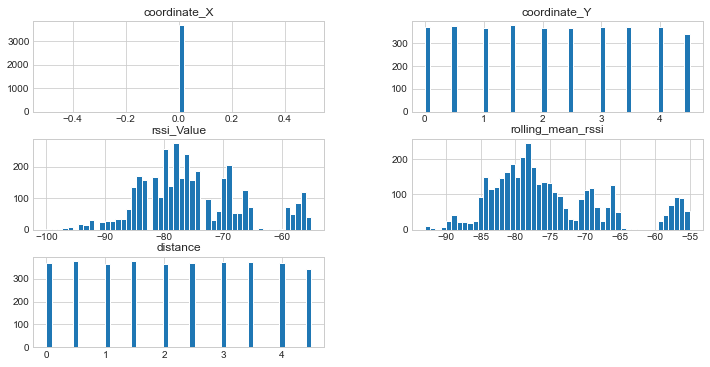

In [5]:
test_dataset = load_file('../../dataset_test_university.csv')
positions = test_dataset['coordinate_Y']
test_dataset['distance'] = positions
replace_features_nan(test_dataset)
display(test_dataset)
display(test_dataset.shape)
test_dataset.hist(bins=50,figsize=(12,6))
plt.show()

### Initialize Test Set (HOME | BIG DATASET SAMSUNG)

,coordinate_X,coordinate_Y,rssi_Value,rolling_mean_rssi,zone,distance
0,0.0,0.0,-47,-47.000000,Personal,0.0
1,0.0,0.0,-46,-46.500000,Personal,0.0
2,0.0,0.0,-46,-46.333333,Personal,0.0
3,0.0,0.0,-47,-46.500000,Personal,0.0
4,0.0,0.0,-47,-46.600000,Personal,0.0
...,...,...,...,...,...,...
12470,0.0,3.5,-87,-84.555556,Social,3.5
12471,0.0,3.5,-87,-84.684211,Social,3.5
12472,0.0,3.5,-87,-84.800000,Social,3.5
12473,0.0,3.5,-87,-84.904762,Social,3.5


(12475, 6)

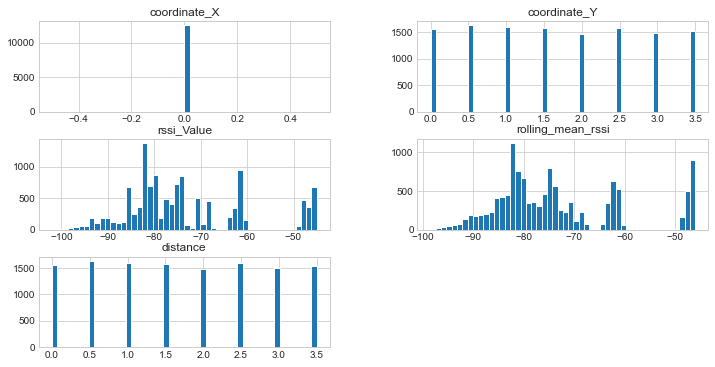

In [6]:
test_dataset_home_big = load_file('../../dataset_test_home_big.csv')
positions = test_dataset_home_big['coordinate_Y']
test_dataset_home_big['distance'] = positions
replace_features_nan(test_dataset_home_big)
display(test_dataset_home_big)
display(test_dataset_home_big.shape)
test_dataset_home_big.hist(bins=50,figsize=(12,6))
plt.show()

### Initialize Test Set (HOME | SMALL DATASET SAMSUNG)

,coordinate_X,coordinate_Y,rssi_Value,rolling_mean_rssi,zone,distance
0,0.0,0.0,-44,-44.000000,Personal,0.0
1,0.0,0.0,-44,-44.000000,Personal,0.0
2,0.0,0.0,-44,-44.000000,Personal,0.0
3,0.0,0.0,-44,-44.000000,Personal,0.0
4,0.0,0.0,-45,-44.200000,Personal,0.0
...,...,...,...,...,...,...
2279,0.0,3.5,-84,-83.944444,Social,3.5
2280,0.0,3.5,-85,-84.000000,Social,3.5
2281,0.0,3.5,-85,-84.050000,Social,3.5
2282,0.0,3.5,-92,-84.428571,Social,3.5


(2284, 6)

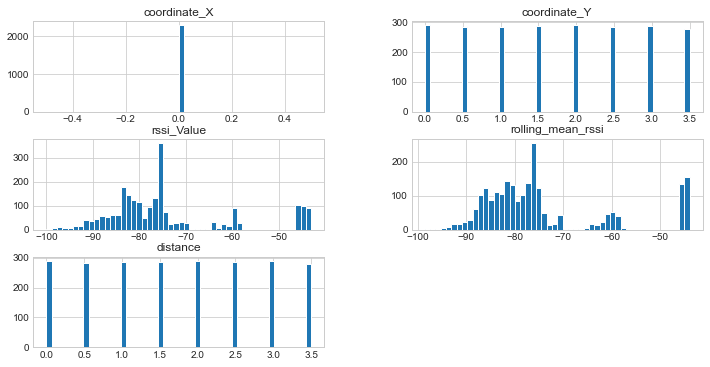

In [7]:
test_dataset_home_small = load_file('../../dataset_test_home.csv')
positions = test_dataset_home_small['coordinate_Y']
test_dataset_home_small['distance'] = positions
replace_features_nan(test_dataset_home_small)
display(test_dataset_home_small)
display(test_dataset_home_small.shape)
test_dataset_home_small.hist(bins=50,figsize=(12,6))
plt.show()

### Initialize Test Set (HOME | SMALL DATASET ASUS)

,coordinate_X,coordinate_Y,rssi_Value,rolling_mean_rssi,zone,distance
0,0.0,0.0,-50,-50.000000,Personal,0.0
1,0.0,0.0,-50,-50.000000,Personal,0.0
2,0.0,0.0,-53,-51.000000,Personal,0.0
3,0.0,0.0,-51,-51.000000,Personal,0.0
4,0.0,0.0,-53,-53.000000,Personal,0.0
...,...,...,...,...,...,...
410,0.0,3.5,-86,-83.800000,Social,3.5
411,0.0,3.5,-88,-84.500000,Social,3.5
412,0.0,3.5,-84,-84.428571,Social,3.5
413,0.0,3.5,-83,-84.250000,Social,3.5


(415, 6)

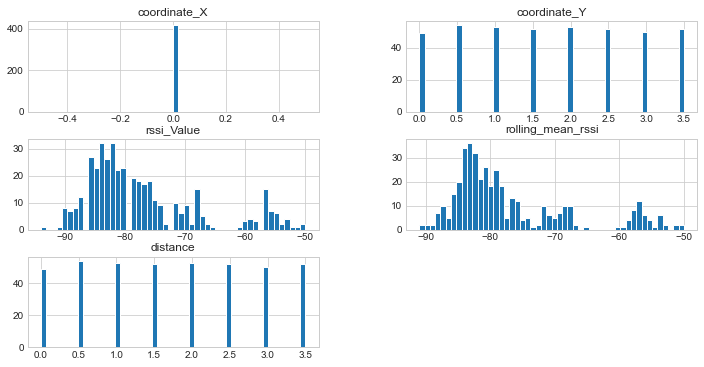

In [8]:
test_dataset_home_asus = load_file('../../dataset_test_home_asus.csv')
positions = test_dataset_home_asus['coordinate_Y']
test_dataset_home_asus['distance'] = positions
replace_features_nan(test_dataset_home_asus)
display(test_dataset_home_asus)
display(test_dataset_home_asus.shape)
test_dataset_home_asus.hist(bins=50,figsize=(12,6))
plt.show()

### Dataset Overall Info

In [9]:
display(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24834 entries, 0 to 24833
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   coordinate_X       24834 non-null  float64
 1   coordinate_Y       24834 non-null  float64
 2   rssi_Value         24834 non-null  int64  
 3   rolling_mean_rssi  24834 non-null  float64
 4   zone               24834 non-null  object 
 5   distance           24834 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.1+ MB


None

### File Overall Description
Usage of describe pandas function on the dataset

In [10]:
display(dataset.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
coordinate_X,24834.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
coordinate_Y,24834.0,2.210196,1.436557,0.0,1.000000,2.0,3.500000,4.5
rssi_Value,24834.0,-76.687243,11.255077,-102.0,-84.000000,-78.0,-73.000000,-46.0
rolling_mean_rssi,24834.0,-76.677952,10.969519,-99.0,-83.666667,-78.5,-73.767308,-46.0
distance,24834.0,2.210196,1.436557,0.0,1.000000,2.0,3.500000,4.5


### % of Missing Values

In [11]:
def compute_missing_values(dataset): 
    missing_values = dataset.isnull().sum()
    missing_values_dataset = pd.DataFrame(missing_values,columns=['Missing Values'])
    missing_percentage = (dataset.isnull().sum() / dataset.count())
    missing_percentage_dataset = pd.DataFrame(missing_percentage,columns=['% of Missing Values'])
    missing_dataset = missing_values_dataset.join(missing_percentage_dataset)
    display(missing_dataset)

In [12]:
compute_missing_values(dataset)

,Missing Values,% of Missing Values
coordinate_X,0,0.0
coordinate_Y,0,0.0
rssi_Value,0,0.0
rolling_mean_rssi,0,0.0
zone,0,0.0
distance,0,0.0


### Overall Histogram of dataset atributes

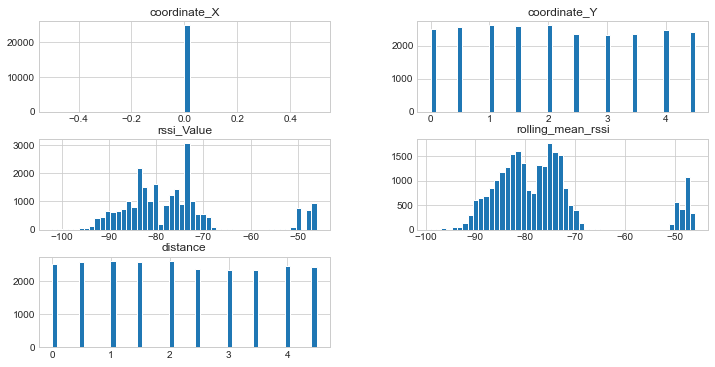

In [13]:
dataset.hist(bins=50,figsize=(12,6))
plt.show()

### Target Attribute - Zone
Graphical display of the zones scanned in the experiment

<AxesSubplot:xlabel='zone'>

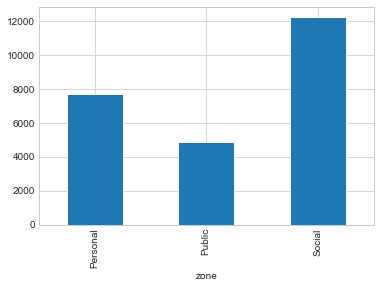

In [14]:
reference_points = dataset.groupby(['zone'])
reference_points.size().plot(kind="bar")

<AxesSubplot:xlabel='zone,distance'>

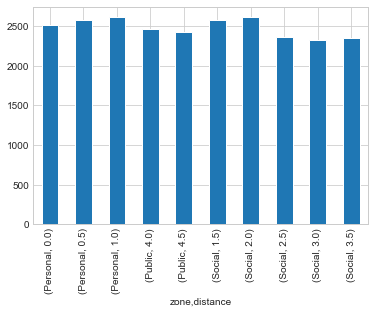

In [15]:
reference_points = dataset.groupby(['zone','distance'])
reference_points.size().plot(kind="bar")

### Beacon RSSI Display
Graphical display of the rssi values recorded at each position

C:\DevelopmentTools\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


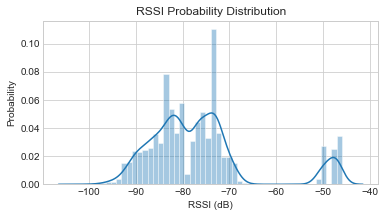

In [16]:
plt.figure(figsize=(6,3))
# Title
plt.title('RSSI Probability Distribution')

sns.distplot(dataset['rssi_Value'])
# The X Label
plt.xlabel('RSSI (dB)')
# The Y Label
plt.ylabel('Probability')
# Show the plot
plt.show()

### Beacon Rolling Mean RSSI Display
Graphical adisplay of the rolling mean value recorded at each position

C:\DevelopmentTools\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


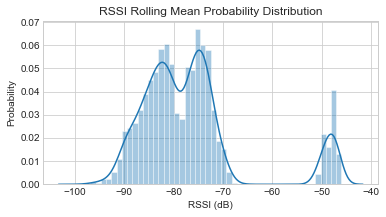

In [17]:
plt.figure(figsize=(6,3))
# Title
plt.title('RSSI Rolling Mean Probability Distribution')
# The KDE plot for the Rolling Mean column
sns.distplot(dataset['rolling_mean_rssi'])
# The X Label
plt.xlabel('RSSI (dB)')
# The Y Label
plt.ylabel('Probability')
# Show the plot
plt.show()

### Graphical Display of RSSI/Rolling Mean Distribution
Graphical display of the previous measures - rssi and rolling mean

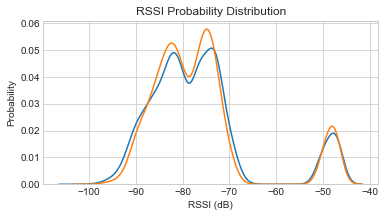

In [18]:
plt.figure(figsize=(6,3))
# Title
plt.title('RSSI Probability Distribution')
# The KDE plot for the RSSI column
sns.kdeplot(dataset['rssi_Value'], label='RSSI')
# The KDE plot for the Rolling Mean column
sns.kdeplot(dataset['rolling_mean_rssi'], label='Rolling Mean RSSI')
# The X Label
plt.xlabel('RSSI (dB)')
# The Y Label
plt.ylabel('Probability')
# Show the plot
plt.show()

### Correlations
Check how much each attribute collerates with each other. Valures frange from -1 to 1. Close to 1 means a strong positive correlation.

In [19]:
def compute_correlations(dataset):
    corr_matrix = dataset.corr()
    display(corr_matrix)
    display(corr_matrix['distance'].sort_values(ascending=False))
    attributes = ["distance","rssi_Value", "rolling_mean_rssi"]
    scatter_matrix(dataset[attributes], figsize=(12, 8))

,coordinate_X,coordinate_Y,rssi_Value,rolling_mean_rssi,distance
coordinate_X,NaN,NaN,NaN,NaN,NaN
coordinate_Y,NaN,1.000000,-0.723705,-0.741381,1.000000
rssi_Value,NaN,-0.723705,1.000000,0.958999,-0.723705
rolling_mean_rssi,NaN,-0.741381,0.958999,1.000000,-0.741381
distance,NaN,1.000000,-0.723705,-0.741381,1.000000


coordinate_Y         1.000000
distance             1.000000
rssi_Value          -0.723705
rolling_mean_rssi   -0.741381
coordinate_X              NaN
Name: distance, dtype: float64

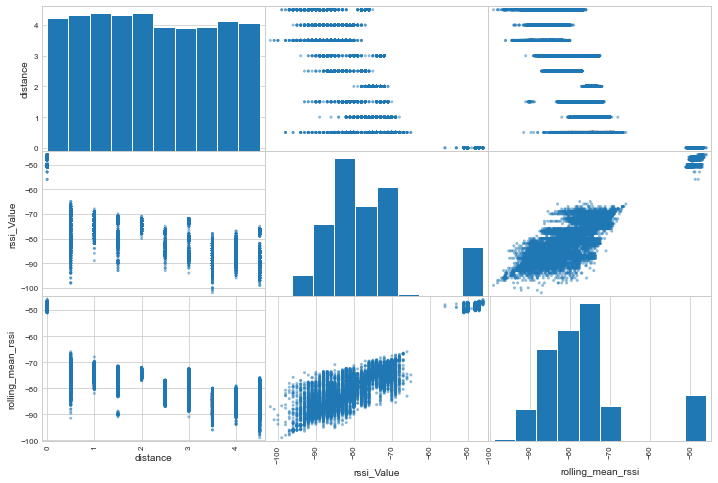

In [20]:
compute_correlations(dataset)

### Data Cleaning
Fill in missing values and fix/remove outliers

In [21]:
def compute_data_cleaning(dataset,feature):
    nan_filler = dataset[feature].min()*1.010
    dataset[feature] = dataset[feature].fillna(nan_filler) # Fill missing values

In [22]:
compute_data_cleaning(dataset,'rssi_Value')
compute_data_cleaning(dataset,'rolling_mean_rssi')
compute_data_cleaning(test_dataset,'rssi_Value')
compute_data_cleaning(test_dataset,'rolling_mean_rssi')
compute_data_cleaning(test_dataset_home_big,'rssi_Value')
compute_data_cleaning(test_dataset_home_big,'rolling_mean_rssi')
compute_data_cleaning(test_dataset_home_small,'rssi_Value')
compute_data_cleaning(test_dataset_home_small,'rolling_mean_rssi')
compute_data_cleaning(test_dataset_home_asus,'rssi_Value')
compute_data_cleaning(test_dataset_home_asus,'rolling_mean_rssi')

### Dealing with Categorical Data
Using Hot-Encoder or Label Encoder to convert text/categorical data into numerical data. ML algorithms prefer it

In [23]:
label_encoder = LabelEncoder()
def compute_encoder(categorical_data,flag):
    if flag == 0:
        labels = label_encoder.fit_transform(categorical_data)
    else:
        labels = label_encoder.transform(categorical_data)
    return labels

In [24]:
categorical_zone = dataset[['zone']]
print("Previous Categorical Data")
display(categorical_zone)
zone_changed = compute_encoder(categorical_zone,0)
print("After One Hot Encoder")
dataset['labels'] = zone_changed
train_Y = dataset['labels'].values.reshape(-1,1)
display(train_Y)

Previous Categorical Data


,zone
0,Personal
1,Personal
2,Personal
3,Personal
4,Personal
...,...
24829,Public
24830,Public
24831,Public
24832,Public


After One Hot Encoder


C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [25]:
categorical_zone = test_dataset[['zone']]
print("Previous Categorical Data")
display(categorical_zone)
test_changed = compute_encoder(categorical_zone,1)
print("After One Hot Encoder")
test_dataset['labels'] = test_changed
test_Y = test_dataset['labels'].values.reshape(-1,1)
display(test_Y.shape)

Previous Categorical Data


,zone
0,Public
1,Public
2,Public
3,Public
4,Public
...,...
3672,Personal
3673,Personal
3674,Personal
3675,Personal


After One Hot Encoder


C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


(3677, 1)

In [26]:
categorical_zone = test_dataset_home_big[['zone']]
print("Previous Categorical Data")
display(categorical_zone)
test_changed = compute_encoder(categorical_zone,1)
print("After One Hot Encoder")
test_dataset_home_big['labels'] = test_changed
test_Y_home_big = test_dataset_home_big['labels'].values.reshape(-1,1)
display(test_Y_home_big.shape)

Previous Categorical Data


,zone
0,Personal
1,Personal
2,Personal
3,Personal
4,Personal
...,...
12470,Social
12471,Social
12472,Social
12473,Social


After One Hot Encoder


C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


(12475, 1)

In [27]:
categorical_zone = test_dataset_home_small[['zone']]
print("Previous Categorical Data")
display(categorical_zone)
test_changed = compute_encoder(categorical_zone,1)
print("After One Hot Encoder")
test_dataset_home_small['labels'] = test_changed
test_Y_home_small = test_dataset_home_small['labels'].values.reshape(-1,1)
display(test_Y_home_small.shape)

Previous Categorical Data


,zone
0,Personal
1,Personal
2,Personal
3,Personal
4,Personal
...,...
2279,Social
2280,Social
2281,Social
2282,Social


After One Hot Encoder


C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


(2284, 1)

In [28]:
categorical_zone = test_dataset_home_asus[['zone']]
print("Previous Categorical Data")
display(categorical_zone)
test_changed = compute_encoder(categorical_zone,1)
print("After One Hot Encoder")
test_dataset_home_asus['labels'] = test_changed
test_Y_home_asus = test_dataset_home_asus['labels'].values.reshape(-1,1)
display(test_Y_home_asus.shape)

Previous Categorical Data


,zone
0,Personal
1,Personal
2,Personal
3,Personal
4,Personal
...,...
410,Social
411,Social
412,Social
413,Social


After One Hot Encoder


C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


(415, 1)

### Initialize Training Data
Training Data intialization for predictions purposes

In [29]:
train_X_rssi = pd.DataFrame(dataset['rssi_Value']).values.reshape(-1,1)
display(train_X_rssi.shape)
train_X_rolling_mean = pd.DataFrame(dataset['rolling_mean_rssi']).values.reshape(-1,1)
display(train_X_rolling_mean.shape)
combination_features_X = dataset[['rssi_Value','rolling_mean_rssi']]
display(combination_features_X.shape)

(24834, 1)

(24834, 1)

(24834, 2)

In [30]:
data_plot_means = dataset.groupby(['zone'])[['rssi_Value','rolling_mean_rssi']].mean()
display(data_plot_means)

,rssi_Value,rolling_mean_rssi
zone,,
Personal,-66.101350,-66.075278
Public,-84.953374,-84.856790
Social,-80.050008,-80.086162


### Plot Training Data
Graphical Display of the observations in the dataset

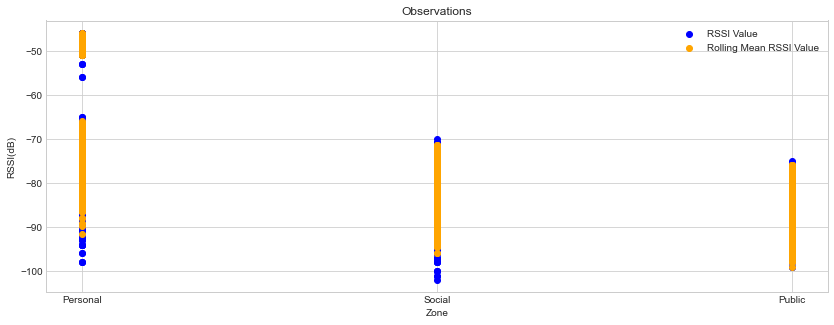

In [31]:
plt.figure(figsize=(14,5))
plt.scatter(dataset['zone'],dataset['rssi_Value'],label='RSSI Value',color='blue')
plt.scatter(dataset['zone'],dataset['rolling_mean_rssi'],label='Rolling Mean RSSI Value',color='orange')
plt.title('Observations')  
plt.xlabel('Zone')  
plt.ylabel('RSSI(dB)')  
plt.legend(loc='upper right');
plt.show()

### Initialize Test Data

In [32]:
test_X_rssi = pd.DataFrame(test_dataset['rssi_Value']).values.reshape(-1,1)
display(test_X_rssi.shape)
test_X_rolling_mean = pd.DataFrame(test_dataset['rolling_mean_rssi']).values.reshape(-1,1)
display(test_X_rolling_mean.shape)
test_combination_features_X = test_dataset[['rssi_Value','rolling_mean_rssi']]
display(test_combination_features_X.shape)

(3677, 1)

(3677, 1)

(3677, 2)

In [33]:
data_plot_means = test_dataset.groupby(['zone'])[['rssi_Value','rolling_mean_rssi']].mean()
display(data_plot_means)

,rssi_Value,rolling_mean_rssi
zone,,
Personal,-66.634563,-66.593533
Public,-81.438819,-81.521907
Social,-78.235580,-78.069045


In [34]:
test_X_rssi_home_big = pd.DataFrame(test_dataset_home_big['rssi_Value']).values.reshape(-1,1)
display(test_X_rssi_home_big.shape)
test_X_rolling_mean_home_big = pd.DataFrame(test_dataset_home_big['rolling_mean_rssi']).values.reshape(-1,1)
display(test_X_rolling_mean_home_big.shape)
test_combination_features_X_home_big = test_dataset_home_big[['rssi_Value','rolling_mean_rssi']]
display(test_combination_features_X_home_big.shape)

(12475, 1)

(12475, 1)

(12475, 2)

In [35]:
data_plot_means = test_dataset_home_big.groupby(['zone'])[['rssi_Value','rolling_mean_rssi']].mean()
display(data_plot_means)

,rssi_Value,rolling_mean_rssi
zone,,
Personal,-60.626277,-60.688594
Social,-81.402474,-81.424138


In [36]:
test_X_rssi_home_small = pd.DataFrame(test_dataset_home_small['rssi_Value']).values.reshape(-1,1)
display(test_X_rssi_home_small.shape)
test_X_rolling_mean_home_small = pd.DataFrame(test_dataset_home_small['rolling_mean_rssi']).values.reshape(-1,1)
display(test_X_rolling_mean_home_small.shape)
test_combination_features_X_home_small = test_dataset_home_small[['rssi_Value','rolling_mean_rssi']]
display(test_combination_features_X_home_small.shape)

(2284, 1)

(2284, 1)

(2284, 2)

In [37]:
data_plot_means = test_dataset_home_small.groupby(['zone'])[['rssi_Value','rolling_mean_rssi']].mean()
display(data_plot_means)

,rssi_Value,rolling_mean_rssi
zone,,
Personal,-63.987165,-64.275969
Social,-80.535389,-80.579521


In [38]:
test_X_rssi_home_asus = pd.DataFrame(test_dataset_home_asus['rssi_Value']).values.reshape(-1,1)
display(test_X_rssi_home_asus.shape)
test_X_rolling_mean_home_asus = pd.DataFrame(test_dataset_home_asus['rolling_mean_rssi']).values.reshape(-1,1)
display(test_X_rolling_mean_home_asus.shape)
test_combination_features_X_home_asus = test_dataset_home_asus[['rssi_Value','rolling_mean_rssi']]
display(test_combination_features_X_home_asus.shape)

(415, 1)

(415, 1)

(415, 2)

In [39]:
data_plot_means = test_dataset_home_asus.groupby(['zone'])[['rssi_Value','rolling_mean_rssi']].mean()
display(data_plot_means)

,rssi_Value,rolling_mean_rssi
zone,,
Personal,-69.205128,-69.220368
Social,-82.181467,-82.010114


### Plot Test Data

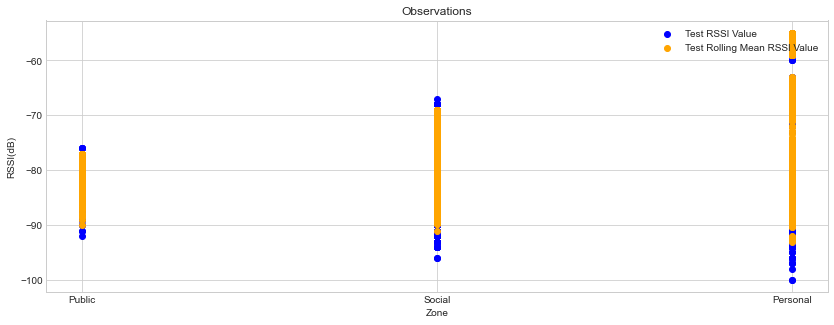

In [40]:
plt.figure(figsize=(14,5))
plt.scatter(test_dataset['zone'],test_dataset['rssi_Value'],label='Test RSSI Value',color='blue')
plt.scatter(test_dataset['zone'],test_dataset['rolling_mean_rssi'],label='Test Rolling Mean RSSI Value',color='orange')
plt.title('Observations')  
plt.xlabel('Zone')  
plt.ylabel('RSSI(dB)')  
plt.legend(loc='upper right');
plt.show()

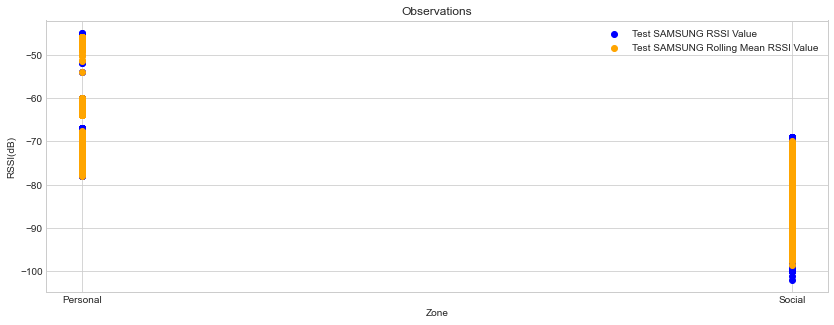

In [41]:
plt.figure(figsize=(14,5))
plt.scatter(test_dataset_home_big['zone'],test_dataset_home_big['rssi_Value'],label='Test SAMSUNG RSSI Value',color='blue')
plt.scatter(test_dataset_home_big['zone'],test_dataset_home_big['rolling_mean_rssi'],label='Test SAMSUNG Rolling Mean RSSI Value',color='orange')
plt.title('Observations')  
plt.xlabel('Zone')  
plt.ylabel('RSSI(dB)')  
plt.legend(loc='upper right');
plt.show()

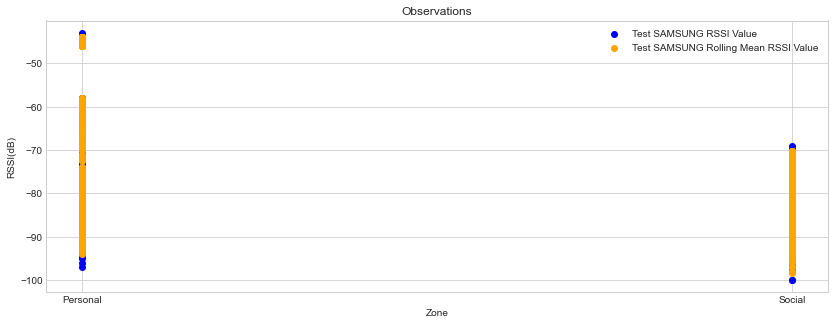

In [42]:
plt.figure(figsize=(14,5))
plt.scatter(test_dataset_home_small['zone'],test_dataset_home_small['rssi_Value'],label='Test SAMSUNG RSSI Value',color='blue')
plt.scatter(test_dataset_home_small['zone'],test_dataset_home_small['rolling_mean_rssi'],label='Test SAMSUNG Rolling Mean RSSI Value',color='orange')
plt.title('Observations')  
plt.xlabel('Zone')  
plt.ylabel('RSSI(dB)')  
plt.legend(loc='upper right');
plt.show()

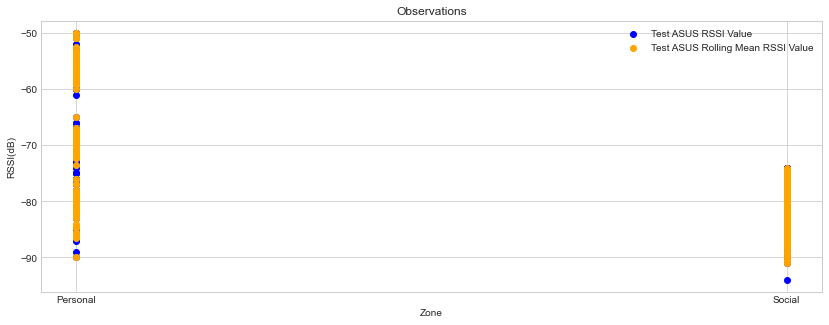

In [43]:
plt.figure(figsize=(14,5))
plt.scatter(test_dataset_home_asus['zone'],test_dataset_home_asus['rssi_Value'],label='Test ASUS RSSI Value',color='blue')
plt.scatter(test_dataset_home_asus['zone'],test_dataset_home_asus['rolling_mean_rssi'],label='Test ASUS Rolling Mean RSSI Value',color='orange')
plt.title('Observations')  
plt.xlabel('Zone')  
plt.ylabel('RSSI(dB)')  
plt.legend(loc='upper right');
plt.show()

### Initialize Hyperparameters for tunning

In [44]:
rf_basic = RandomForestClassifier()
print("DEFAULT HYPERPARAMETERS")
default_params = rf_basic.get_params()
display(pd.DataFrame(default_params,index=[1])) 
#Preprocessing options
scaler = [StandardScaler(),MaxAbsScaler(),MinMaxScaler(),None]
# Number of trees in random forest
initial_linespace = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)] 
n_estimators = [10,100] + initial_linespace
# Criterion to consider at every split
criterion_metric = ['gini','entropy']
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'rf__n_estimators': n_estimators,
               'rf__criterion': criterion_metric,
               'rf__max_features': max_features,
               'rf__max_depth': max_depth,
               'rf__min_samples_split': min_samples_split,
               'rf__min_samples_leaf': min_samples_leaf,
               'rf__bootstrap': bootstrap}
print(random_grid)

DEFAULT HYPERPARAMETERS


,bootstrap,ccp_alpha,class_weight,criterion,max_depth,max_features,max_leaf_nodes,max_samples,min_impurity_decrease,min_impurity_split,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,n_estimators,n_jobs,oob_score,random_state,verbose,warm_start
1,True,0.0,None,gini,None,auto,None,None,0.0,None,1,2,0.0,100,None,False,None,0,False


{'rf__n_estimators': [10, 100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'rf__criterion': ['gini', 'entropy'], 'rf__max_features': ['auto', 'sqrt', 'log2'], 'rf__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'rf__min_samples_split': [2, 5, 10], 'rf__min_samples_leaf': [1, 2, 4], 'rf__bootstrap': [True, False]}


### Statistics Output Format
Structure of the statistical output of each call to the machine learning algorithm

In [45]:
def structure_data(data,precision,accuracy,f1score, statistics=None):
    mae = data['error'].abs().mean()
    mse = np.power(data['error'],2).mean()
    rsme = np.sqrt(mse)
    precision = precision
    accuracy = accuracy
    f1score = f1score
    statistical_results = [mae,mse,rsme,precision,accuracy,f1score]
    if statistics is not None:
        micro = [statistics.loc['accuracy','precision'], statistics.loc['accuracy','recall'], statistics.loc['accuracy','f1-score']] if 'accuracy' in statistics.index else [statistics.loc['micro avg','precision'],statistics.loc['micro avg','recall'], statistics.loc['micro avg','f1-score']]
        macro = [statistics.loc['macro avg','precision'], statistics.loc['macro avg','recall'], statistics.loc['macro avg','f1-score']]
        weighted = [statistics.loc['weighted avg','precision'], statistics.loc['weighted avg','recall'], statistics.loc['weighted avg','f1-score']]
        return statistical_results + micro + macro + weighted
    else:
        return statistical_results

### Feature Selection
Check strength of features using ensemble algorithm Random Forest

Feature Selection Computation


array([0.3782282, 0.6217718])

rolling_mean_rssi    0.621772
rssi_Value           0.378228
dtype: float64

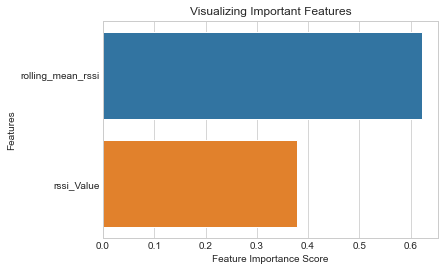

In [46]:
print("Feature Selection Computation")
random_forest_estimator = RandomForestClassifier()
main_estimator = make_pipeline(StandardScaler(),random_forest_estimator)
main_estimator.fit(combination_features_X,train_Y.ravel())
display(random_forest_estimator.feature_importances_)
feature_imp = pd.Series(random_forest_estimator.feature_importances_,index=combination_features_X.columns).sort_values(ascending=False)
display(feature_imp)
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Model Training and Evaluation - RF Classification Model

In [47]:
def compute_RF_Classification(flag=0,
                              trainX_data = None, trainY_data = None,
                              testX_data = None,testY_data = None, 
                              scaler = None,cross_validation = None,
                              n_estimators_parameter = 100, criterion_parameter = 'gini',
                              max_depth_parameter = None,min_samples_split_parameter = 2,
                              min_samples_leaf_parameter = 1,max_features_parameter = 'auto',
                              bootstrap_parameter = True, random_state_parameter = 6):
    random_forest_estimator = RandomForestClassifier(n_estimators=n_estimators_parameter,criterion=criterion_parameter,
                                                    max_features=max_features_parameter,max_depth=max_depth_parameter,
                                                    min_samples_leaf=min_samples_leaf_parameter,min_samples_split=min_samples_split_parameter,
                                                    bootstrap=bootstrap_parameter,random_state=random_state_parameter)
    if scaler is not None:
        # Make pipeline using scaler transformation
        main_estimator = make_pipeline(scaler,random_forest_estimator)
    else:
        main_estimator = random_forest_estimator
    if cross_validation is None:
        # Fit the training data
        main_estimator.fit(trainX_data,trainY_data)
        # Predict the results of the testing data features
        predict_test = main_estimator.predict(testX_data)
        matrix = confusion_matrix(testY_data, predict_test)
        report = classification_report(testY_data, predict_test,output_dict=True)
        accuracy = accuracy_score(testY_data,predict_test)
    else:
        predict_test = cross_val_predict(main_estimator,testX_data,testY_data,cv = cross_validation)
        matrix = confusion_matrix(testY_data, predict_test)
        report = classification_report(testY_data, predict_test,output_dict=True)
        accuracy = accuracy_score(testY_data,predict_test)
    statistical_array = list()
    statistics = pd.DataFrame(report).transpose()
    error_dataframe = pd.DataFrame({'Actual': testY_data.flatten(), 'Predicted':predict_test.flatten()})
    if flag == 1:
        print("Confusion Matrix:")
        print(matrix)
        display(statistics)
        display(error_dataframe)
        error_dataframe.apply(pd.value_counts).plot(kind='bar', subplots=True)
    error = pd.DataFrame(np.where(error_dataframe['Actual'] != error_dataframe['Predicted'],1,0), columns=["error"])
    result = pd.DataFrame(train_Y,columns=["zone"]).join(error)
    return structure_data(result,statistics['precision'].mean(),accuracy,statistics['f1-score'].mean(),statistics)

#### Check Training model with no cross validation

Confusion Matrix:
[[5533  305 1868]
 [ 169 2557 2164]
 [ 707 1671 9860]]


,precision,recall,f1-score,support
0,0.863317,0.718012,0.783989,7706.000000
1,0.564086,0.522904,0.542715,4890.000000
2,0.709761,0.805687,0.754688,12238.000000
accuracy,0.722799,0.722799,0.722799,0.722799
macro avg,0.712388,0.682201,0.693797,24834.000000
weighted avg,0.728725,0.722799,0.722041,24834.000000


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
24829,1,1
24830,1,1
24831,1,1
24832,1,1


Confusion Matrix:
[[ 5778   191  1737]
 [  114  2747  2029]
 [  852  1138 10248]]


,precision,recall,f1-score,support
0,0.856762,0.749805,0.799723,7706.000000
1,0.673945,0.561759,0.612759,4890.000000
2,0.731269,0.837392,0.780741,12238.000000
accuracy,0.755939,0.755939,0.755939,0.755939
macro avg,0.753992,0.716319,0.731074,24834.000000
weighted avg,0.758922,0.755939,0.753554,24834.000000


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
24829,1,1
24830,1,2
24831,1,1
24832,1,1


Confusion Matrix:
[[ 6945   111   650]
 [   45  3978   867]
 [  238   537 11463]]


,precision,recall,f1-score,support
0,0.960847,0.901246,0.930092,7706.000000
1,0.859922,0.813497,0.836066,4890.000000
2,0.883128,0.936673,0.909113,12238.000000
accuracy,0.901425,0.901425,0.901425,0.901425
macro avg,0.901299,0.883805,0.891757,24834.000000
weighted avg,0.902675,0.901425,0.901239,24834.000000


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
24829,1,1
24830,1,1
24831,1,1
24832,1,1


,mae,mse,rmse,precision,accuracy,f1-score,micro precision,micro recall,micro f1-score,macro precision,macro recall,macro f1-score,weighted precision,weighted recall,weighted f1-score,type
2,0.098575,0.098575,0.313966,0.901549,0.901425,0.894949,0.901425,0.901425,0.901425,0.901299,0.883805,0.891757,0.902675,0.901425,0.901239,Both
1,0.244061,0.244061,0.494025,0.755138,0.755939,0.738965,0.755939,0.755939,0.755939,0.753992,0.716319,0.731074,0.758922,0.755939,0.753554,Rolling Mean RSSI
0,0.277201,0.277201,0.526498,0.716846,0.722799,0.703338,0.722799,0.722799,0.722799,0.712388,0.682201,0.693797,0.728725,0.722799,0.722041,RSSI Only


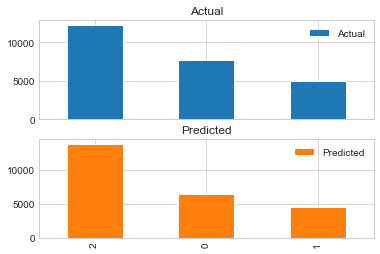

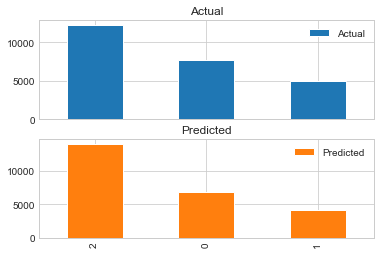

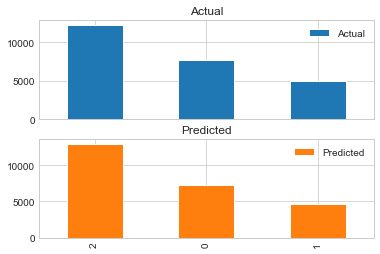

In [48]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score',
                    'micro precision', 'micro recall', 'micro f1-score',
                    'macro precision', 'macro recall', 'macro f1-score',
                    'weighted precision', 'weighted recall', 'weighted f1-score',
                    'type']
types = ['RSSI Only','Rolling Mean RSSI','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'RSSI Only':
        trainX_data = train_X_rssi
    elif feature == 'Rolling Mean RSSI':
        trainX_data = train_X_rolling_mean
    else:
        trainX_data = combination_features_X 
    result = compute_RF_Classification(flag=1,trainX_data=trainX_data,trainY_data=train_Y.ravel(),
                                   testX_data=trainX_data,testY_data=train_Y.ravel(),
                                   scaler=StandardScaler())
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))

#### Experiment - RF with StratifiedKFold
Experiment using cross validation approach of StratifiedKFold

,mae,mse,rmse,precision,accuracy,f1-score,micro precision,micro recall,micro f1-score,macro precision,macro recall,macro f1-score,weighted precision,weighted recall,weighted f1-score,folds,type
10,0.378715,0.378715,0.615398,0.607252,0.621285,0.611488,0.621285,0.621285,0.621285,0.599587,0.618830,0.606898,0.623878,0.621285,0.620050,4,Both
11,0.386527,0.386527,0.621713,0.601490,0.613473,0.606101,0.613473,0.613473,0.613473,0.594009,0.619002,0.602668,0.619432,0.613473,0.612460,5,Both
9,0.392285,0.392285,0.626326,0.597427,0.607715,0.600301,0.607715,0.607715,0.607715,0.590356,0.605981,0.596067,0.615422,0.607715,0.609820,3,Both
1,0.394983,0.394983,0.628476,0.588221,0.605017,0.580831,0.605017,0.605017,0.605017,0.581177,0.563363,0.569880,0.599601,0.605017,0.600447,3,RSSI Only
3,0.421156,0.421156,0.648966,0.564727,0.578844,0.563683,0.578844,0.578844,0.578844,0.558579,0.555750,0.556646,0.575202,0.578844,0.576673,5,RSSI Only
2,0.420593,0.420593,0.648531,0.565870,0.579407,0.563057,0.579407,0.579407,0.579407,0.560282,0.556002,0.555878,0.574684,0.579407,0.575423,4,RSSI Only
7,0.460860,0.460860,0.678867,0.523566,0.539140,0.524150,0.539140,0.539140,0.539140,0.515844,0.517584,0.516693,0.538880,0.539140,0.538987,5,Rolling Mean RSSI
5,0.461102,0.461102,0.679045,0.526687,0.538898,0.523790,0.538898,0.538898,0.538898,0.519544,0.513096,0.515834,0.543048,0.538898,0.540507,3,Rolling Mean RSSI
6,0.460820,0.460820,0.678837,0.522613,0.539180,0.522155,0.539180,0.539180,0.539180,0.514575,0.513033,0.513772,0.538196,0.539180,0.538663,4,Rolling Mean RSSI
8,0.473947,0.473947,0.688438,0.506961,0.526053,0.509367,0.526053,0.526053,0.526053,0.498832,0.511277,0.502393,0.520383,0.526053,0.520578,2,Both


Number of Folds:  4


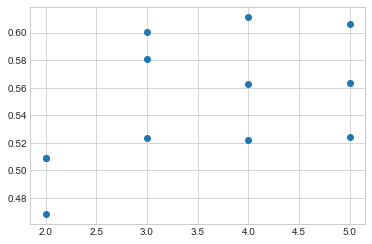

In [49]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score',
                    'micro precision', 'micro recall', 'micro f1-score',
                    'macro precision', 'macro recall', 'macro f1-score',
                    'weighted precision', 'weighted recall', 'weighted f1-score',
                    'folds','type']
types = ['RSSI Only','Rolling Mean RSSI','Both']
cross_validation_list = np.arange(2,6)
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'RSSI Only':
        trainX_data = train_X_rssi
    elif feature == 'Rolling Mean RSSI':
        trainX_data = train_X_rolling_mean
    else:
        trainX_data = combination_features_X 
    for cv in cross_validation_list:
        result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = cv)  
        result.append(cv)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.scatter(statistics['folds'],statistics['f1-score'])
selected_fold = statistics.sort_values(by=['f1-score'],ascending=False)['folds'].head(1).values[0]
print("Number of Folds: ",selected_fold)

#### Experiment - RF with HoldOut
Experiment using cross validation approach of HoldOut (Train test split)

,mae,mse,rmse,precision,accuracy,f1-score,micro precision,micro recall,micro f1-score,macro precision,macro recall,macro f1-score,weighted precision,weighted recall,weighted f1-score,test_size,type
18,0.248390,0.248390,0.498387,0.739488,0.751610,0.736369,0.751610,0.751610,0.751610,0.733394,0.724787,0.728806,0.751742,0.751610,0.751379,0.1,Both
19,0.249245,0.249245,0.499244,0.740189,0.750755,0.734897,0.750755,0.750755,0.750755,0.734891,0.720791,0.727138,0.750817,0.750755,0.750079,0.2,Both
22,0.252799,0.252799,0.502791,0.736875,0.747201,0.732923,0.747201,0.747201,0.747201,0.731061,0.721287,0.725610,0.749801,0.747201,0.747900,0.5,Both
21,0.253976,0.253976,0.503961,0.734733,0.746024,0.730782,0.746024,0.746024,0.746024,0.728742,0.718413,0.723114,0.747409,0.746024,0.746215,0.4,Both
20,0.254999,0.254999,0.504975,0.734173,0.745001,0.730104,0.745001,0.745001,0.745001,0.728445,0.717742,0.722625,0.746259,0.745001,0.745125,0.3,Both
23,0.256560,0.256560,0.506517,0.732603,0.743440,0.729484,0.743440,0.743440,0.743440,0.726594,0.718912,0.722324,0.745800,0.743440,0.744170,0.6,Both
24,0.258283,0.258283,0.508216,0.729978,0.741717,0.727040,0.741717,0.741717,0.741717,0.723552,0.716246,0.719522,0.743945,0.741717,0.742435,0.7,Both
25,0.257801,0.257801,0.507742,0.730908,0.742199,0.726252,0.742199,0.742199,0.742199,0.725214,0.712737,0.718402,0.742393,0.742199,0.741707,0.8,Both
26,0.265357,0.265357,0.515128,0.722008,0.734643,0.720566,0.734643,0.734643,0.734643,0.715350,0.711703,0.713392,0.736004,0.734643,0.735187,0.9,Both
0,0.275362,0.275362,0.524750,0.719097,0.724638,0.704539,0.724638,0.724638,0.724638,0.714501,0.682651,0.694629,0.731938,0.724638,0.724084,0.1,RSSI Only


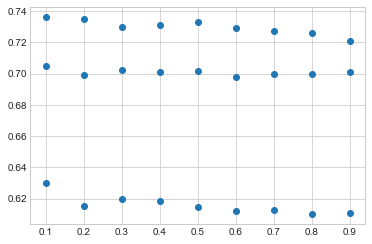

In [50]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score',
                    'micro precision', 'micro recall', 'micro f1-score',
                    'macro precision', 'macro recall', 'macro f1-score',
                    'weighted precision', 'weighted recall', 'weighted f1-score',
                    'test_size','type']
test_sizes =[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
results = list()
types = ['RSSI Only','Rolling Mean RSSI','Both']
for feature in types:
    #Decide on type of data
    if feature == 'RSSI Only':
        trainX_data = train_X_rssi
    elif feature == 'Rolling Mean RSSI':
        trainX_data = train_X_rolling_mean
    else:
        trainX_data = combination_features_X 
    for size in test_sizes:
        X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = size, random_state = 42,stratify=train_Y)
        result = compute_RF_Classification(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,scaler=StandardScaler())
        result.append(size)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.scatter(statistics['test_size'],statistics['f1-score'])

#### Experiment - RF with Leave One Group Out 
Experiment using cross validation approach of Leave One Group Out

In [51]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score',
                    'micro precision', 'micro recall', 'micro f1-score',
                    'macro precision', 'macro recall', 'macro f1-score',
                    'weighted precision', 'weighted recall', 'weighted f1-score',
                    'type']
results = list()
types = ['RSSI Only','Rolling Mean RSSI','Both']
for feature in types:
    #Decide on type of data
    if feature == 'RSSI Only':
        trainX_data = train_X_rssi
    elif feature == 'Rolling Mean RSSI':
        trainX_data = train_X_rolling_mean
    else:
        trainX_data = combination_features_X 
    cv = LeaveOneGroupOut()
    splited = cv.split(trainX_data,train_Y.ravel(),groups=train_Y.ravel())
    result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = splited)  
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))

,mae,mse,rmse,precision,accuracy,f1-score,micro precision,micro recall,micro f1-score,macro precision,macro recall,macro f1-score,weighted precision,weighted recall,weighted f1-score,type
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RSSI Only
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Rolling Mean RSSI
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Both


#### Evaluation Model Cross-Validation Experiment - Best cross-validation technique
Best parameters found using RF

,mae,mse,rmse,precision,accuracy,f1-score,micro precision,micro recall,micro f1-score,macro precision,macro recall,macro f1-score,weighted precision,weighted recall,weighted f1-score,method,type
7,0.253976,0.253976,0.503961,0.734733,0.746024,0.730782,0.746024,0.746024,0.746024,0.728742,0.718413,0.723114,0.747409,0.746024,0.746215,HoldOut,Both
1,0.279545,0.279545,0.528720,0.718344,0.720455,0.700830,0.720455,0.720455,0.720455,0.714838,0.677841,0.691165,0.730252,0.720455,0.719864,HoldOut,RSSI Only
4,0.357963,0.357963,0.598300,0.629754,0.642037,0.618238,0.642037,0.642037,0.642037,0.623237,0.596738,0.606936,0.643536,0.642037,0.639649,HoldOut,Rolling Mean RSSI
8,0.378715,0.378715,0.615398,0.607252,0.621285,0.611488,0.621285,0.621285,0.621285,0.599587,0.618830,0.606898,0.623878,0.621285,0.620050,Stratified K-Fold,Both
2,0.420593,0.420593,0.648531,0.565870,0.579407,0.563057,0.579407,0.579407,0.579407,0.560282,0.556002,0.555878,0.574684,0.579407,0.575423,Stratified K-Fold,RSSI Only
5,0.460820,0.460820,0.678837,0.522613,0.539180,0.522155,0.539180,0.539180,0.539180,0.514575,0.513033,0.513772,0.538196,0.539180,0.538663,Stratified K-Fold,Rolling Mean RSSI
0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,LOO,RSSI Only
3,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,LOO,Rolling Mean RSSI
6,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,LOO,Both


Selected cross validation method:  HoldOut


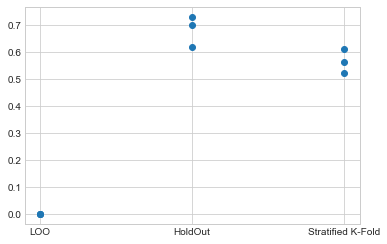

In [52]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score',
                    'micro precision', 'micro recall', 'micro f1-score',
                    'macro precision', 'macro recall', 'macro f1-score',
                    'weighted precision', 'weighted recall', 'weighted f1-score',
                    'method','type']
types = ['RSSI Only','Rolling Mean RSSI','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'RSSI Only':
        trainX_data = train_X_rssi
    elif feature == 'Rolling Mean RSSI':
        trainX_data = train_X_rolling_mean
    else:
        trainX_data = combination_features_X 
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.4, random_state = 42,stratify=train_Y)
    holdout = compute_RF_Classification(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,scaler=StandardScaler())
    cv = LeaveOneGroupOut()
    splited = cv.split(trainX_data,train_Y.ravel(),groups=train_Y.ravel())
    loo = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = splited)  
    loo.append('LOO')
    loo.append(feature)
    results.append(loo)
    holdout.append('HoldOut')
    holdout.append(feature)
    results.append(holdout)
    skfold = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = selected_fold)
    skfold.append('Stratified K-Fold')
    skfold.append(feature)
    results.append(skfold)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.plot(statistics['method'],statistics['f1-score'],'o')
selected_method = statistics.sort_values(by=['f1-score'],ascending=False)['method'].head(1).values[0]
print("Selected cross validation method: ",selected_method)

#### Experiment - Best preprocessing technique
Experiment with the different preprocessing techniques

,mae,mse,rmse,precision,accuracy,f1-score,micro precision,micro recall,micro f1-score,macro precision,macro recall,macro f1-score,weighted precision,weighted recall,weighted f1-score,preprocessing,preprocessingFunc,type
10,0.253372,0.253372,0.503361,0.735295,0.746628,0.731383,0.746628,0.746628,0.746628,0.729297,0.719044,0.723717,0.747956,0.746628,0.746801,MinMaxScaler,MinMaxScaler(),Both
8,0.253976,0.253976,0.503961,0.734733,0.746024,0.730782,0.746024,0.746024,0.746024,0.728742,0.718413,0.723114,0.747409,0.746024,0.746215,StandardScaler,StandardScaler(),Both
11,0.254077,0.254077,0.504060,0.734621,0.745923,0.730690,0.745923,0.745923,0.745923,0.728627,0.718345,0.723027,0.747293,0.745923,0.746111,None,None,Both
9,0.254178,0.254178,0.504160,0.734510,0.745822,0.730597,0.745822,0.745822,0.745822,0.728507,0.718277,0.722935,0.747208,0.745822,0.746021,MaxAbsScaler,MaxAbsScaler(),Both
0,0.279545,0.279545,0.528720,0.718344,0.720455,0.700830,0.720455,0.720455,0.720455,0.714838,0.677841,0.691165,0.730252,0.720455,0.719864,StandardScaler,StandardScaler(),RSSI Only
1,0.279545,0.279545,0.528720,0.718344,0.720455,0.700830,0.720455,0.720455,0.720455,0.714838,0.677841,0.691165,0.730252,0.720455,0.719864,MaxAbsScaler,MaxAbsScaler(),RSSI Only
2,0.279545,0.279545,0.528720,0.718344,0.720455,0.700830,0.720455,0.720455,0.720455,0.714838,0.677841,0.691165,0.730252,0.720455,0.719864,MinMaxScaler,MinMaxScaler(),RSSI Only
3,0.279545,0.279545,0.528720,0.718344,0.720455,0.700830,0.720455,0.720455,0.720455,0.714838,0.677841,0.691165,0.730252,0.720455,0.719864,None,None,RSSI Only
6,0.357862,0.357862,0.598216,0.629885,0.642138,0.618384,0.642138,0.642138,0.642138,0.623380,0.596908,0.607100,0.643654,0.642138,0.639765,MinMaxScaler,MinMaxScaler(),Rolling Mean RSSI
7,0.357862,0.357862,0.598216,0.629885,0.642138,0.618384,0.642138,0.642138,0.642138,0.623380,0.596908,0.607100,0.643654,0.642138,0.639765,None,None,Rolling Mean RSSI


Selected Preprocessing:  MinMaxScaler


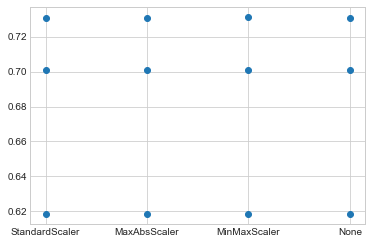

In [53]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score',
                    'micro precision', 'micro recall', 'micro f1-score',
                    'macro precision', 'macro recall', 'macro f1-score',
                    'weighted precision', 'weighted recall', 'weighted f1-score',
                    'preprocessing','preprocessingFunc','type']
types = ['RSSI Only','Rolling Mean RSSI','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'RSSI Only':
        trainX_data = train_X_rssi
    elif feature == 'Rolling Mean RSSI':
        trainX_data = train_X_rolling_mean
    else:
        trainX_data = combination_features_X 
    for preprocess in scaler:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y.ravel(),groups=train_Y.ravel())
            result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=preprocess,cross_validation = splited)  
        elif selected_method =='Stratified K-Fold':
            result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=preprocess,cross_validation = selected_fold)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.4, random_state = 42,stratify=train_Y)
            result = compute_RF_Classification(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,scaler=preprocess)
        if(preprocess is None):
            regex = 'None'
        else:
            regex = re.search('(\w+)\(',str(preprocess)).group(1)
        result.append(regex)
        result.append(preprocess)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.scatter(statistics['preprocessing'],statistics['f1-score'])
selected_preprocessing = statistics.sort_values(by=['f1-score'],ascending=False)['preprocessing'].head(1).values[0]
selected_preprocesssing_func = statistics.sort_values(by=['f1-score'],ascending=False)['preprocessingFunc'].head(1).values[0]
print("Selected Preprocessing: ",selected_preprocessing)

#### Experiment - Running the RF function with the different number of decision trees

,mae,mse,rmse,precision,accuracy,f1-score,micro precision,micro recall,micro f1-score,macro precision,macro recall,macro f1-score,weighted precision,weighted recall,weighted f1-score,n_estimator,type
24,0.254681,0.254681,0.504659,0.733691,0.745319,0.730917,0.745319,0.745319,0.745319,0.727418,0.720343,0.723569,0.747157,0.745319,0.745906,10,Both
28,0.253775,0.253775,0.503761,0.734790,0.746225,0.730837,0.746225,0.746225,0.746225,0.728788,0.718362,0.723123,0.747360,0.746225,0.746304,600,Both
25,0.253976,0.253976,0.503961,0.734733,0.746024,0.730782,0.746024,0.746024,0.746024,0.728742,0.718413,0.723114,0.747409,0.746024,0.746215,100,Both
26,0.253574,0.253574,0.503561,0.735290,0.746426,0.730718,0.746426,0.746426,0.746426,0.729414,0.717462,0.722864,0.747660,0.746426,0.746427,200,Both
29,0.253976,0.253976,0.503961,0.734521,0.746024,0.730587,0.746024,0.746024,0.746024,0.728494,0.718101,0.722851,0.747125,0.746024,0.746093,800,Both
27,0.254077,0.254077,0.504060,0.734707,0.745923,0.730498,0.745923,0.745923,0.745923,0.728780,0.717753,0.722762,0.747200,0.745923,0.746017,400,Both
30,0.254379,0.254379,0.504360,0.734096,0.745621,0.730321,0.745621,0.745621,0.745621,0.728011,0.718096,0.722626,0.746908,0.745621,0.745802,1000,Both
31,0.254782,0.254782,0.504759,0.733830,0.745218,0.729877,0.745218,0.745218,0.745218,0.727780,0.717459,0.722154,0.746644,0.745218,0.745428,1200,Both
34,0.254983,0.254983,0.504958,0.733607,0.745017,0.729750,0.745017,0.745017,0.745017,0.727556,0.717465,0.722065,0.746401,0.745017,0.745226,1800,Both
32,0.254983,0.254983,0.504958,0.733453,0.745017,0.729657,0.745017,0.745017,0.745017,0.727343,0.717380,0.721930,0.746330,0.745017,0.745207,1400,Both


Selected Estimator Size:  10


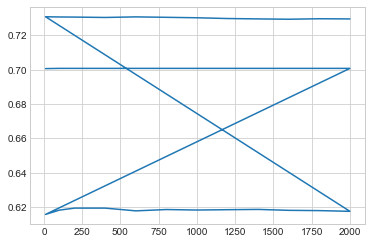

In [54]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score',
                    'micro precision', 'micro recall', 'micro f1-score',
                    'macro precision', 'macro recall', 'macro f1-score',
                    'weighted precision', 'weighted recall', 'weighted f1-score',
                    'n_estimator','type']
types = ['RSSI Only','Rolling Mean RSSI','Both']
results = list()
for scannedType in types:
    if scannedType == 'RSSI Only':
        trainX_data = train_X_rssi
    elif scannedType == 'Rolling Mean RSSI':
        trainX_data = train_X_rolling_mean
    else:
        trainX_data = combination_features_X
    for n in n_estimators:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(X_train,train_Y.ravel(),groups=train_Y.ravel())
            result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = splited,
                                n_estimators_parameter=n)  
        elif selected_method =='Stratified K-Fold':
            result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),
                                                 cross_validation = selected_fold,
                                 n_estimators_parameter=n)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.4,
                                                                                        random_state = 42,stratify=train_Y)
            result = compute_RF_Classification(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                 scaler=StandardScaler(), n_estimators_parameter=n)
        result.append(n)
        result.append(scannedType)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.plot(statistics['n_estimator'],statistics['f1-score'])
selected_estimator_size = statistics.sort_values(by=['f1-score'],ascending=False)['n_estimator'].head(1).values[0]
print("Selected Estimator Size: ",selected_estimator_size)

#### Experiment - Running the RF function with the different criterias

,mae,mse,rmse,precision,accuracy,f1-score,micro precision,micro recall,micro f1-score,macro precision,macro recall,macro f1-score,weighted precision,weighted recall,weighted f1-score,criterion,type
4,0.253976,0.253976,0.503961,0.734733,0.746024,0.730782,0.746024,0.746024,0.746024,0.728742,0.718413,0.723114,0.747409,0.746024,0.746215,gini,Both
5,0.254379,0.254379,0.504360,0.734198,0.745621,0.730176,0.745621,0.745621,0.745621,0.728147,0.717629,0.722413,0.746978,0.745621,0.745786,entropy,Both
0,0.279545,0.279545,0.528720,0.718344,0.720455,0.700830,0.720455,0.720455,0.720455,0.714838,0.677841,0.691165,0.730252,0.720455,0.719864,gini,RSSI Only
1,0.279545,0.279545,0.528720,0.718344,0.720455,0.700830,0.720455,0.720455,0.720455,0.714838,0.677841,0.691165,0.730252,0.720455,0.719864,entropy,RSSI Only
2,0.357963,0.357963,0.598300,0.629754,0.642037,0.618238,0.642037,0.642037,0.642037,0.623237,0.596738,0.606936,0.643536,0.642037,0.639649,gini,Rolling Mean RSSI
3,0.357963,0.357963,0.598300,0.629754,0.642037,0.618238,0.642037,0.642037,0.642037,0.623237,0.596738,0.606936,0.643536,0.642037,0.639649,entropy,Rolling Mean RSSI


Selected Criterion:  gini


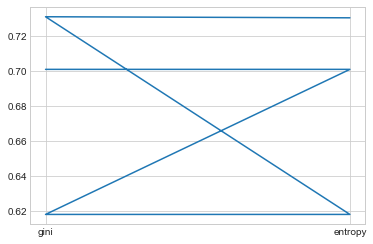

In [55]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score',
                    'micro precision', 'micro recall', 'micro f1-score',
                    'macro precision', 'macro recall', 'macro f1-score',
                    'weighted precision', 'weighted recall', 'weighted f1-score',
                    'criterion','type']
types = ['RSSI Only','Rolling Mean RSSI','Both']
results = list()
for scannedType in types:
    if scannedType == 'RSSI Only':
        trainX_data = train_X_rssi
    elif scannedType == 'Rolling Mean RSSI':
        trainX_data = train_X_rolling_mean
    else:
        trainX_data = combination_features_X
    for metric in criterion_metric:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(X_train,train_Y.ravel(),groups=train_Y.ravel())
            result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = splited,
                                criterion_parameter=metric)  
        elif selected_method =='Stratified K-Fold':
            result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),
                                                 cross_validation = selected_fold,
                                 criterion_parameter=metric)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.4,
                                                                                        random_state = 42,stratify=train_Y)
            result = compute_RF_Classification(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                 scaler=StandardScaler(), criterion_parameter=metric)
        result.append(metric)
        result.append(scannedType)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.plot(statistics['criterion'],statistics['f1-score'])
selected_criterion = statistics.sort_values(by=['f1-score'],ascending=False)['criterion'].head(1).values[0]
print("Selected Criterion: ",selected_criterion)

#### Experiment - Running the RF function with the different max_features 

,mae,mse,rmse,precision,accuracy,f1-score,micro precision,micro recall,micro f1-score,macro precision,macro recall,macro f1-score,weighted precision,weighted recall,weighted f1-score,max_feature,type
6,0.253976,0.253976,0.503961,0.734733,0.746024,0.730782,0.746024,0.746024,0.746024,0.728742,0.718413,0.723114,0.747409,0.746024,0.746215,auto,Both
7,0.253976,0.253976,0.503961,0.734733,0.746024,0.730782,0.746024,0.746024,0.746024,0.728742,0.718413,0.723114,0.747409,0.746024,0.746215,sqrt,Both
8,0.253976,0.253976,0.503961,0.734733,0.746024,0.730782,0.746024,0.746024,0.746024,0.728742,0.718413,0.723114,0.747409,0.746024,0.746215,log2,Both
0,0.279545,0.279545,0.528720,0.718344,0.720455,0.700830,0.720455,0.720455,0.720455,0.714838,0.677841,0.691165,0.730252,0.720455,0.719864,auto,RSSI Only
1,0.279545,0.279545,0.528720,0.718344,0.720455,0.700830,0.720455,0.720455,0.720455,0.714838,0.677841,0.691165,0.730252,0.720455,0.719864,sqrt,RSSI Only
2,0.279545,0.279545,0.528720,0.718344,0.720455,0.700830,0.720455,0.720455,0.720455,0.714838,0.677841,0.691165,0.730252,0.720455,0.719864,log2,RSSI Only
3,0.357963,0.357963,0.598300,0.629754,0.642037,0.618238,0.642037,0.642037,0.642037,0.623237,0.596738,0.606936,0.643536,0.642037,0.639649,auto,Rolling Mean RSSI
4,0.357963,0.357963,0.598300,0.629754,0.642037,0.618238,0.642037,0.642037,0.642037,0.623237,0.596738,0.606936,0.643536,0.642037,0.639649,sqrt,Rolling Mean RSSI
5,0.357963,0.357963,0.598300,0.629754,0.642037,0.618238,0.642037,0.642037,0.642037,0.623237,0.596738,0.606936,0.643536,0.642037,0.639649,log2,Rolling Mean RSSI


Selected max_feature:  auto


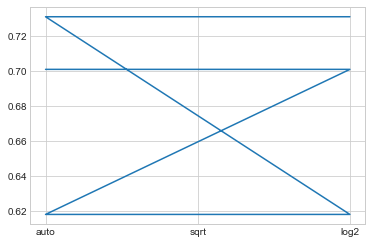

In [56]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score',
                    'micro precision', 'micro recall', 'micro f1-score',
                    'macro precision', 'macro recall', 'macro f1-score',
                    'weighted precision', 'weighted recall', 'weighted f1-score',
                    'max_feature','type']
types = ['RSSI Only','Rolling Mean RSSI','Both']
results = list()
for scannedType in types:
    if scannedType == 'RSSI Only':
        trainX_data = train_X_rssi
    elif scannedType == 'Rolling Mean RSSI':
        trainX_data = train_X_rolling_mean
    else:
        trainX_data = combination_features_X
    for max_feature in max_features:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(X_train,train_Y.ravel(),groups=train_Y.ravel())
            result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = splited,
                                max_features_parameter=max_feature)  
        elif selected_method =='Stratified K-Fold':
            result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),
                                                 cross_validation = selected_fold,
                                 max_features_parameter=max_feature)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.4,
                                                                                        random_state = 42,stratify=train_Y)
            result = compute_RF_Classification(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                 scaler=StandardScaler(), max_features_parameter=max_feature)
        result.append(max_feature)
        result.append(scannedType)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.plot(statistics['max_feature'],statistics['f1-score'])
selected_max_feature = statistics.sort_values(by=['f1-score'],ascending=False)['max_feature'].head(1).values[0]
print("Selected max_feature: ",selected_max_feature)

#### Experiment - Running the RF function with the different max_depth metric

,mae,mse,rmse,precision,accuracy,f1-score,micro precision,micro recall,micro f1-score,macro precision,macro recall,macro f1-score,weighted precision,weighted recall,weighted f1-score,max_depth,type
24,0.212704,0.212704,0.461198,0.788223,0.787296,0.771930,0.787296,0.787296,0.787296,0.787239,0.749696,0.764528,0.793083,0.787296,0.786174,10.0,Both
25,0.250654,0.250654,0.500654,0.738065,0.749346,0.733477,0.749346,0.749346,0.749346,0.732230,0.720082,0.725594,0.750126,0.749346,0.749141,20.0,Both
35,0.253976,0.253976,0.503961,0.734733,0.746024,0.730782,0.746024,0.746024,0.746024,0.728742,0.718413,0.723114,0.747409,0.746024,0.746215,NaN,Both
34,0.253976,0.253976,0.503961,0.734733,0.746024,0.730782,0.746024,0.746024,0.746024,0.728742,0.718413,0.723114,0.747409,0.746024,0.746215,110.0,Both
33,0.253976,0.253976,0.503961,0.734733,0.746024,0.730782,0.746024,0.746024,0.746024,0.728742,0.718413,0.723114,0.747409,0.746024,0.746215,100.0,Both
32,0.253976,0.253976,0.503961,0.734733,0.746024,0.730782,0.746024,0.746024,0.746024,0.728742,0.718413,0.723114,0.747409,0.746024,0.746215,90.0,Both
31,0.253976,0.253976,0.503961,0.734733,0.746024,0.730782,0.746024,0.746024,0.746024,0.728742,0.718413,0.723114,0.747409,0.746024,0.746215,80.0,Both
30,0.253976,0.253976,0.503961,0.734733,0.746024,0.730782,0.746024,0.746024,0.746024,0.728742,0.718413,0.723114,0.747409,0.746024,0.746215,70.0,Both
29,0.253976,0.253976,0.503961,0.734733,0.746024,0.730782,0.746024,0.746024,0.746024,0.728742,0.718413,0.723114,0.747409,0.746024,0.746215,60.0,Both
28,0.253976,0.253976,0.503961,0.734733,0.746024,0.730782,0.746024,0.746024,0.746024,0.728742,0.718413,0.723114,0.747409,0.746024,0.746215,50.0,Both


Selected max_depth:  10.0


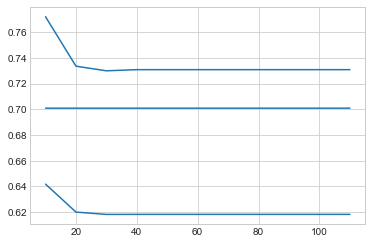

In [57]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score',
                    'micro precision', 'micro recall', 'micro f1-score',
                    'macro precision', 'macro recall', 'macro f1-score',
                    'weighted precision', 'weighted recall', 'weighted f1-score',
                    'max_depth','type']
types = ['RSSI Only','Rolling Mean RSSI','Both']
results = list()
for scannedType in types:
    if scannedType == 'RSSI Only':
        trainX_data = train_X_rssi
    elif scannedType == 'Rolling Mean RSSI':
        trainX_data = train_X_rolling_mean
    else:
        trainX_data = combination_features_X
    for depth in max_depth:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(X_train,train_Y.ravel(),groups=train_Y.ravel())
            result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = splited,
                                max_depth_parameter=depth)  
        elif selected_method =='Stratified K-Fold':
            result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),
                                                 cross_validation = selected_fold,
                                 max_depth_parameter=depth)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.4,
                                                                                        random_state = 42,stratify=train_Y)
            result = compute_RF_Classification(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                 scaler=StandardScaler(), max_depth_parameter=depth)
        result.append(depth)
        result.append(scannedType)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.plot(statistics['max_depth'],statistics['f1-score'])
selected_max_depth = statistics.sort_values(by=['f1-score'],ascending=False)['max_depth'].head(1).values[0]
print("Selected max_depth: ",selected_max_depth)

#### Experiment: Running the RF function with the different min_samples_split metric

,mae,mse,rmse,precision,accuracy,f1-score,micro precision,micro recall,micro f1-score,macro precision,macro recall,macro f1-score,weighted precision,weighted recall,weighted f1-score,min_samples_split,type
8,0.226596,0.226596,0.476021,0.765870,0.773404,0.757891,0.773404,0.773404,0.773404,0.761693,0.741517,0.750272,0.775047,0.773404,0.772850,10,Both
7,0.243205,0.243205,0.493158,0.747214,0.756795,0.742032,0.756795,0.756795,0.756795,0.741989,0.728657,0.734622,0.758537,0.756795,0.756911,5,Both
6,0.253976,0.253976,0.503961,0.734733,0.746024,0.730782,0.746024,0.746024,0.746024,0.728742,0.718413,0.723114,0.747409,0.746024,0.746215,2,Both
0,0.279545,0.279545,0.528720,0.718344,0.720455,0.700830,0.720455,0.720455,0.720455,0.714838,0.677841,0.691165,0.730252,0.720455,0.719864,2,RSSI Only
1,0.279646,0.279646,0.528815,0.718227,0.720354,0.700692,0.720354,0.720354,0.720354,0.714716,0.677671,0.691012,0.730144,0.720354,0.719752,5,RSSI Only
2,0.279646,0.279646,0.528815,0.718166,0.720354,0.700675,0.720354,0.720354,0.720354,0.714637,0.677671,0.690989,0.730092,0.720354,0.719744,10,RSSI Only
4,0.355245,0.355245,0.596024,0.633352,0.644755,0.620304,0.644755,0.644755,0.644755,0.627161,0.597678,0.608766,0.646711,0.644755,0.642002,5,Rolling Mean RSSI
5,0.354540,0.354540,0.595433,0.635006,0.645460,0.620016,0.645460,0.645460,0.645460,0.629112,0.596015,0.608095,0.648129,0.645460,0.642257,10,Rolling Mean RSSI
3,0.357963,0.357963,0.598300,0.629754,0.642037,0.618238,0.642037,0.642037,0.642037,0.623237,0.596738,0.606936,0.643536,0.642037,0.639649,2,Rolling Mean RSSI


Selected min_samples_split:  10


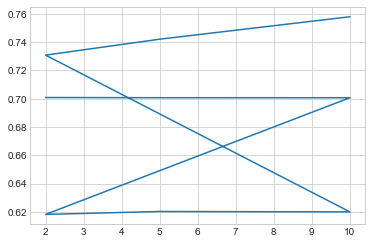

In [58]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score',
                    'micro precision', 'micro recall', 'micro f1-score',
                    'macro precision', 'macro recall', 'macro f1-score',
                    'weighted precision', 'weighted recall', 'weighted f1-score',
                    'min_samples_split','type']
types = ['RSSI Only','Rolling Mean RSSI','Both']
results = list()
for scannedType in types:
    if scannedType == 'RSSI Only':
        trainX_data = train_X_rssi
    elif scannedType == 'Rolling Mean RSSI':
        trainX_data = train_X_rolling_mean
    else:
        trainX_data = combination_features_X
    for s in min_samples_split:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(X_train,train_Y.ravel(),groups=train_Y.ravel())
            result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = splited,
                                min_samples_split_parameter=s)  
        elif selected_method =='Stratified K-Fold':
            result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),
                                                 cross_validation = selected_fold,
                                 min_samples_split_parameter=s)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.4,
                                                                                        random_state = 42,stratify=train_Y)
            result = compute_RF_Classification(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                 scaler=StandardScaler(), min_samples_split_parameter=s)
        result.append(s)
        result.append(scannedType)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.plot(statistics['min_samples_split'],statistics['f1-score'])
selected_min_samples_splith = statistics.sort_values(by=['f1-score'],ascending=False)['min_samples_split'].head(1).values[0]
print("Selected min_samples_split: ",selected_min_samples_splith)

#### 16th Experiment: Running the RF function with the different min_samples_leaf metric

,mae,mse,rmse,precision,accuracy,f1-score,micro precision,micro recall,micro f1-score,macro precision,macro recall,macro f1-score,weighted precision,weighted recall,weighted f1-score,min_samples_leaf,type
8,0.221361,0.221361,0.470490,0.771426,0.778639,0.763087,0.778639,0.778639,0.778639,0.767461,0.746357,0.755493,0.780073,0.778639,0.777915,4,Both
7,0.232635,0.232635,0.482323,0.758950,0.767365,0.751870,0.767365,0.767365,0.767365,0.754401,0.736288,0.744239,0.768732,0.767365,0.766902,2,Both
6,0.253976,0.253976,0.503961,0.734733,0.746024,0.730782,0.746024,0.746024,0.746024,0.728742,0.718413,0.723114,0.747409,0.746024,0.746215,1,Both
2,0.279243,0.279243,0.528434,0.718818,0.720757,0.701075,0.720757,0.720757,0.720757,0.715350,0.677943,0.691381,0.730749,0.720757,0.720169,4,RSSI Only
0,0.279545,0.279545,0.528720,0.718344,0.720455,0.700830,0.720455,0.720455,0.720455,0.714838,0.677841,0.691165,0.730252,0.720455,0.719864,1,RSSI Only
1,0.279646,0.279646,0.528815,0.718227,0.720354,0.700692,0.720354,0.720354,0.720354,0.714716,0.677671,0.691012,0.730144,0.720354,0.719752,2,RSSI Only
5,0.346789,0.346789,0.588888,0.644824,0.653211,0.628505,0.653211,0.653211,0.653211,0.639561,0.604048,0.616882,0.657488,0.653211,0.650293,4,Rolling Mean RSSI
4,0.352325,0.352325,0.593570,0.637165,0.647675,0.622877,0.647675,0.647675,0.647675,0.631204,0.599457,0.611188,0.650502,0.647675,0.644837,2,Rolling Mean RSSI
3,0.357963,0.357963,0.598300,0.629754,0.642037,0.618238,0.642037,0.642037,0.642037,0.623237,0.596738,0.606936,0.643536,0.642037,0.639649,1,Rolling Mean RSSI


Selected min_samples_leaf:  4


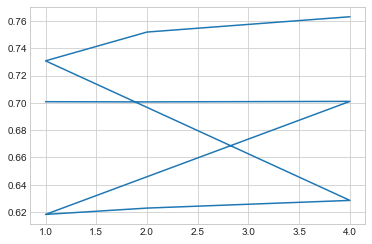

In [59]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score',
                    'micro precision', 'micro recall', 'micro f1-score',
                    'macro precision', 'macro recall', 'macro f1-score',
                    'weighted precision', 'weighted recall', 'weighted f1-score',
                    'min_samples_leaf','type']
types = ['RSSI Only','Rolling Mean RSSI','Both']
results = list()
for scannedType in types:
    if scannedType == 'RSSI Only':
        trainX_data = train_X_rssi
    elif scannedType == 'Rolling Mean RSSI':
        trainX_data = train_X_rolling_mean
    else:
        trainX_data = combination_features_X
    for leaf in min_samples_leaf:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(X_train,train_Y.ravel(),groups=train_Y.ravel())
            result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = splited,
                                min_samples_leaf_parameter=leaf)  
        elif selected_method =='Stratified K-Fold':
            result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),
                                                 cross_validation = selected_fold,
                                 min_samples_leaf_parameter=leaf)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.4,
                                                                                        random_state = 42,stratify=train_Y)
            result = compute_RF_Classification(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                 scaler=StandardScaler(), min_samples_leaf_parameter=leaf)
        result.append(leaf)
        result.append(scannedType)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.plot(statistics['min_samples_leaf'],statistics['f1-score'])
selected_min_samples_leaf = statistics.sort_values(by=['f1-score'],ascending=False)['min_samples_leaf'].head(1).values[0]
print("Selected min_samples_leaf: ",selected_min_samples_leaf)

### Run RandomizedSearchCV for parameter tunning

In [60]:
results = list()
scores = ['f1_macro']
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    for feature in types:
        #Decide on type of data
        if feature == 'RSSI Only':
            trainX_data = train_X_rssi
        elif feature == 'Rolling Mean RSSI':
            trainX_data = train_X_rolling_mean
        else:
            trainX_data = combination_features_X 
        pipe = Pipeline([('standardizer', StandardScaler()), ('rf', RandomForestClassifier())])
        clf = RandomizedSearchCV(
           pipe, param_distributions = random_grid, n_iter = 45, cv=selected_fold,scoring=score,verbose=1,n_jobs=-1
        )
        clf.fit(trainX_data,train_Y.ravel())
        clf.best_params_['score'] = score
        clf.best_params_['best_score'] = clf.best_score_
        clf.best_params_['type'] = feature
        results.append(clf.best_params_)
gridcv_results = pd.DataFrame(results).sort_values(by=['best_score'],ascending=False)
display(gridcv_results)

# Tuning hyper-parameters for f1_macro

Fitting 4 folds for each of 45 candidates, totalling 180 fits
Fitting 4 folds for each of 45 candidates, totalling 180 fits
Fitting 4 folds for each of 45 candidates, totalling 180 fits


,rf__n_estimators,rf__min_samples_split,rf__min_samples_leaf,rf__max_features,rf__max_depth,rf__criterion,rf__bootstrap,score,best_score,type
2,1600,2,4,log2,100,gini,True,f1_macro,0.619141,Both
0,1600,10,4,sqrt,10,gini,True,f1_macro,0.551036,RSSI Only
1,600,10,1,auto,110,gini,True,f1_macro,0.506501,Rolling Mean RSSI


### Best Parameters
Display the best parameters tunned throughout the experiments

In [61]:
conclusion_cols=['Cross_Validation','Number of Estimators','Max Features','Max Depth','Criterion','Min_Samples_Leaf','Min_Samples_Split','Preprocessing']
conclusion_list = [selected_method,selected_estimator_size,selected_max_feature,selected_max_depth,selected_criterion,
                   selected_min_samples_leaf,selected_min_samples_splith,selected_preprocessing]
conclusion_pd = pd.DataFrame([conclusion_list],columns= conclusion_cols)
display(conclusion_pd)

,Cross_Validation,Number of Estimators,Max Features,Max Depth,Criterion,Min_Samples_Leaf,Min_Samples_Split,Preprocessing
0,HoldOut,10,auto,10.0,gini,4,10,MinMaxScaler


### Best Results
Compute RF with the best parameters tuned by RandomGridSearchCV and manually tuned

In [62]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score',
                    'micro precision', 'micro recall', 'micro f1-score',
                    'macro precision', 'macro recall', 'macro f1-score',
                    'weighted precision', 'weighted recall', 'weighted f1-score',
                    'type']
types = ['RSSI Only','Rolling Mean RSSI','Both']
results = list()
final_results = list()
criterion = selected_criterion
estimators = selected_estimator_size
depth = selected_max_depth
max_feat = selected_max_feature
min_samples_split = selected_min_samples_splith
min_samples_leaf = selected_min_samples_leaf
for scannedType in types:
    if scannedType == 'RSSI Only':
        trainX_data = train_X_rssi
    elif scannedType == 'Rolling Mean RSSI':
        trainX_data = train_X_rolling_mean
    else:
        trainX_data = combination_features_X
    if selected_method == 'LOO':
        cv = LeaveOneGroupOut()
        splited = cv.split(X_train,train_Y.ravel(),groups=train_Y.ravel())
        result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = splited,
                            n_estimators_parameter=estimators,criterion_parameter=criterion,
                                          max_depth_parameter=depth, max_features_parameter=max_feat,
                                          min_samples_leaf_parameter=min_samples_leaf,
                                          min_samples_split_parameter=min_samples_split)  
    elif selected_method =='Stratified K-Fold':
        result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),
                                             cross_validation = selected_fold,
                            n_estimators_parameter=estimators,criterion_parameter=criterion,
                                          max_depth_parameter=depth, max_features_parameter=max_feat,
                                          min_samples_leaf_parameter=min_samples_leaf,
                                          min_samples_split_parameter=min_samples_split) 
    else:
        X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.4,
                                                                                    random_state = 42,stratify=train_Y)
        result = compute_RF_Classification(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                             scaler=StandardScaler(),n_estimators_parameter=estimators,criterion_parameter=criterion,
                                          max_depth_parameter=depth, max_features_parameter=max_feat,
                                          min_samples_leaf_parameter=min_samples_leaf,
                                          min_samples_split_parameter=min_samples_split) 
    result.append(scannedType)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending = False))
final_results.append(statistics.sort_values(by=['f1-score'],ascending=False).head(1).values[0])

,mae,mse,rmse,precision,accuracy,f1-score,micro precision,micro recall,micro f1-score,macro precision,macro recall,macro f1-score,weighted precision,weighted recall,weighted f1-score,type
2,0.219247,0.219247,0.468238,0.782934,0.780753,0.765214,0.780753,0.780753,0.780753,0.782356,0.742157,0.757757,0.787430,0.780753,0.779502,Both
0,0.279243,0.279243,0.528434,0.718818,0.720757,0.701075,0.720757,0.720757,0.720757,0.715350,0.677943,0.691381,0.730749,0.720757,0.720169,RSSI Only
1,0.329475,0.329475,0.573999,0.667475,0.670525,0.642687,0.670525,0.670525,0.670525,0.664510,0.613612,0.630201,0.676285,0.670525,0.664791,Rolling Mean RSSI


### Best Results - Testing data (Different Beacon)
Experiment with testing dataset

Confusion Matrix:
[[989  70  52]
 [105 155 451]
 [610 262 983]]


,precision,recall,f1-score,support
0,0.580399,0.890189,0.702664,1111.000000
1,0.318275,0.218003,0.258765,711.000000
2,0.661507,0.529919,0.588447,1855.000000
accuracy,0.578461,0.578461,0.578461,0.578461
macro avg,0.520061,0.546037,0.516625,3677.000000
weighted avg,0.570632,0.578461,0.559209,3677.000000


,Actual,Predicted
0,1,2
1,1,1
2,1,2
3,1,1
4,1,1
...,...,...
3672,0,0
3673,0,0
3674,0,0
3675,0,0


Confusion Matrix:
[[   0    0 1111]
 [   0    0  711]
 [   0    0 1855]]


C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,1111.000000
1,0.000000,0.000000,0.000000,711.000000
2,0.504487,1.000000,0.670644,1855.000000
accuracy,0.504487,0.504487,0.504487,0.504487
macro avg,0.168162,0.333333,0.223548,3677.000000
weighted avg,0.254507,0.504487,0.338331,3677.000000


,Actual,Predicted
0,1,2
1,1,2
2,1,2
3,1,2
4,1,2
...,...,...
3672,0,2
3673,0,2
3674,0,2
3675,0,2


Confusion Matrix:
[[ 950   55  106]
 [   5   63  643]
 [ 392  117 1346]]


,precision,recall,f1-score,support
0,0.705271,0.855086,0.772986,1111.000000
1,0.268085,0.088608,0.133192,711.000000
2,0.642482,0.725606,0.681519,1855.000000
accuracy,0.641556,0.641556,0.641556,0.641556
macro avg,0.538613,0.556433,0.529233,3677.000000
weighted avg,0.589059,0.641556,0.603129,3677.000000


,Actual,Predicted
0,1,2
1,1,2
2,1,2
3,1,2
4,1,2
...,...,...
3672,0,0
3673,0,0
3674,0,0
3675,0,0


Confusion Matrix:
[[   0 1111    0]
 [   0  711    0]
 [   0 1855    0]]


C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,1111.000000
1,0.193364,1.000000,0.324066,711.000000
2,0.000000,0.000000,0.000000,1855.000000
accuracy,0.193364,0.193364,0.193364,0.193364
macro avg,0.064455,0.333333,0.108022,3677.000000
weighted avg,0.037390,0.193364,0.062663,3677.000000


,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
3672,0,1
3673,0,1
3674,0,1
3675,0,1


Confusion Matrix:
[[998  53  60]
 [123  77 511]
 [665 223 967]]


,precision,recall,f1-score,support
0,0.558791,0.898290,0.688989,1111.000000
1,0.218130,0.108298,0.144737,711.000000
2,0.628739,0.521294,0.569997,1855.000000
accuracy,0.555344,0.555344,0.555344,0.555344
macro avg,0.468553,0.509294,0.467908,3677.000000
weighted avg,0.528207,0.555344,0.523720,3677.000000


,Actual,Predicted
0,1,2
1,1,2
2,1,2
3,1,1
4,1,1
...,...,...
3672,0,0
3673,0,0
3674,0,0
3675,0,0


Confusion Matrix:
[[   0    0 1111]
 [   0    0  711]
 [   0    0 1855]]


C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,1111.000000
1,0.000000,0.000000,0.000000,711.000000
2,0.504487,1.000000,0.670644,1855.000000
accuracy,0.504487,0.504487,0.504487,0.504487
macro avg,0.168162,0.333333,0.223548,3677.000000
weighted avg,0.254507,0.504487,0.338331,3677.000000


,Actual,Predicted
0,1,2
1,1,2
2,1,2
3,1,2
4,1,2
...,...,...
3672,0,2
3673,0,2
3674,0,2
3675,0,2


,mae,mse,rmse,precision,accuracy,f1-score,micro precision,micro recall,micro f1-score,macro precision,macro recall,macro f1-score,weighted precision,weighted recall,weighted f1-score,type,Tuning
2,0.358444,0.358444,0.598702,0.564178,0.641556,0.560269,0.641556,0.641556,0.641556,0.538613,0.556433,0.529233,0.589059,0.641556,0.603129,Rolling Mean RSSI,True
0,0.421539,0.421539,0.649261,0.538222,0.578461,0.534028,0.578461,0.578461,0.578461,0.520061,0.546037,0.516625,0.570632,0.578461,0.559209,RSSI Only,True
4,0.444656,0.444656,0.666825,0.492961,0.555344,0.491782,0.555344,0.555344,0.555344,0.468553,0.509294,0.467908,0.528207,0.555344,0.523720,Both,True
1,0.495513,0.495513,0.703927,0.238607,0.504487,0.289502,0.504487,0.504487,0.504487,0.168162,0.333333,0.223548,0.254507,0.504487,0.338331,RSSI Only,False
5,0.495513,0.495513,0.703927,0.238607,0.504487,0.289502,0.504487,0.504487,0.504487,0.168162,0.333333,0.223548,0.254507,0.504487,0.338331,Both,False
3,0.806636,0.806636,0.898129,0.081429,0.193364,0.114686,0.193364,0.193364,0.193364,0.064455,0.333333,0.108022,0.037390,0.193364,0.062663,Rolling Mean RSSI,False


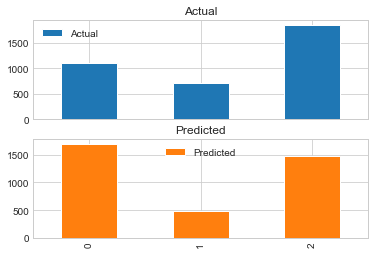

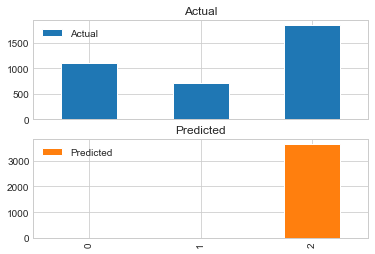

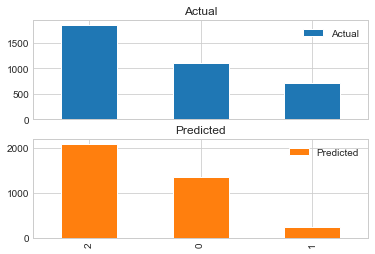

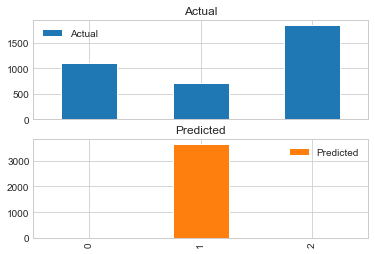

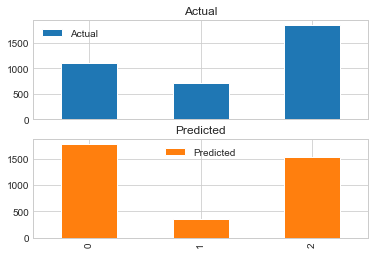

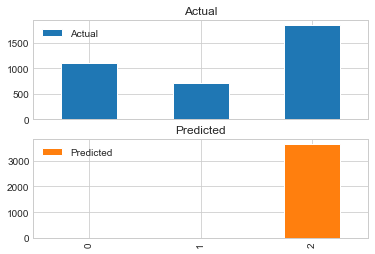

In [63]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score',
                    'micro precision', 'micro recall', 'micro f1-score',
                    'macro precision', 'macro recall', 'macro f1-score',
                    'weighted precision', 'weighted recall', 'weighted f1-score',
                    'type','Tuning']
results = list()
tuning =[True,False]
types = ['RSSI Only','Rolling Mean RSSI','Both']
criterion = selected_criterion
estimators = selected_estimator_size
depth = selected_max_depth
max_feat = selected_max_feature
min_samples_split = selected_min_samples_splith
min_samples_leaf = selected_min_samples_leaf
for feature in types:
    #Decide on type of data
    if feature == 'RSSI Only':
        trainX_data = train_X_rssi
        testX_data = test_X_rssi
    elif feature == 'Rolling Mean RSSI':
        trainX_data = train_X_rolling_mean
        testX_data = test_X_rolling_mean
    else:
        trainX_data = combination_features_X
        testX_data = test_combination_features_X 
    scaler = StandardScaler()
    scaler.fit(trainX_data)
    testX_data = scaler.transform(testX_data)
    for tune in tuning:
        if tune == True:
            model = RandomForestClassifier(n_estimators=estimators,criterion=criterion,
                                                    max_features=max_feat,max_depth=depth,
                                                    min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split)  
        else: 
            model = RandomForestClassifier()
        trainX_data = scaler.transform(trainX_data)
        model.fit(trainX_data,train_Y.ravel())
        predicted = model.predict(testX_data)
        matrix = confusion_matrix(test_Y.ravel(), predicted)
        report = classification_report(test_Y.ravel(), predicted,output_dict=True)
        accuracy = accuracy_score(test_Y.ravel(),predicted)
        statistical_array = list()
        statistics = pd.DataFrame(report).transpose()
        error_dataframe = pd.DataFrame({'Actual': test_Y.flatten(), 'Predicted':predicted.flatten()})
        print("Confusion Matrix:")
        print(matrix)
        display(statistics)
        display(error_dataframe)
        error_dataframe.apply(pd.value_counts).plot(kind='bar', subplots=True)
        error = pd.DataFrame(np.where(error_dataframe['Actual'] != error_dataframe['Predicted'],1,0), columns=["error"])
        result = pd.DataFrame(train_Y,columns=["zone"]).join(error)
        data = structure_data(result,statistics['precision'].mean(),accuracy,statistics['f1-score'].mean(),statistics)
        data.append(feature)
        data.append(tune)
        results.append(data)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
final_results.append(statistics.sort_values(by=['f1-score'],ascending=False).head(1).values[0])

### Best Results - Home Testing data (using data recovered from Android 10 SAMSUNG Galaxy A71 BIG Dataset)
Experiment with testing dataset

Confusion Matrix:
[[4108  105  582]
 [   0    0    0]
 [1536 1248 4896]]


C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.727853,0.856726,0.787049,4795.000000
1,0.000000,0.000000,0.000000,0.000000
2,0.893757,0.637500,0.744186,7680.000000
accuracy,0.721764,0.721764,0.721764,0.721764
macro avg,0.540536,0.498075,0.510412,12475.000000
weighted avg,0.829988,0.721764,0.760661,12475.000000


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
12470,2,2
12471,2,2
12472,2,2
12473,2,2


Confusion Matrix:
[[   0 4795]
 [   0 7680]]


C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,4795.000000
2,0.615631,1.000000,0.762094,7680.000000
accuracy,0.615631,0.615631,0.615631,0.615631
macro avg,0.307816,0.500000,0.381047,12475.000000
weighted avg,0.379002,0.615631,0.469169,12475.000000


,Actual,Predicted
0,0,2
1,0,2
2,0,2
3,0,2
4,0,2
...,...,...
12470,2,2
12471,2,2
12472,2,2
12473,2,2


Confusion Matrix:
[[4143   28  624]
 [   0    0    0]
 [ 952 1187 5541]]


C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.813150,0.864025,0.837816,4795.000000
1,0.000000,0.000000,0.000000,0.000000
2,0.898783,0.721484,0.800433,7680.000000
accuracy,0.776273,0.776273,0.776273,0.776273
macro avg,0.570645,0.528503,0.546083,12475.000000
weighted avg,0.865869,0.776273,0.814802,12475.000000


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
12470,2,2
12471,2,2
12472,2,2
12473,2,2


Confusion Matrix:
[[   0 4795    0]
 [   0    0    0]
 [   0 7680    0]]


C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\DevelopmentTools\Anaconda3\lib\site-packages\

,precision,recall,f1-score,support
0,0.0,0.0,0.0,4795.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,7680.0
accuracy,0.0,0.0,0.0,0.0
macro avg,0.0,0.0,0.0,12475.0
weighted avg,0.0,0.0,0.0,12475.0


,Actual,Predicted
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
12470,2,1
12471,2,1
12472,2,1
12473,2,1


Confusion Matrix:
[[4278   30  487]
 [   0    0    0]
 [1801 1186 4693]]


C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.703734,0.892179,0.786831,4795.000000
1,0.000000,0.000000,0.000000,0.000000
2,0.905985,0.611068,0.729860,7680.000000
accuracy,0.719118,0.719118,0.719118,0.719118
macro avg,0.536573,0.501082,0.505564,12475.000000
weighted avg,0.828246,0.719118,0.751758,12475.000000


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
12470,2,2
12471,2,2
12472,2,2
12473,2,2


Confusion Matrix:
[[   0 4795    0]
 [   0    0    0]
 [   0 7680    0]]


C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\DevelopmentTools\Anaconda3\lib\site-packages\

,precision,recall,f1-score,support
0,0.0,0.0,0.0,4795.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,7680.0
accuracy,0.0,0.0,0.0,0.0
macro avg,0.0,0.0,0.0,12475.0
weighted avg,0.0,0.0,0.0,12475.0


,Actual,Predicted
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
12470,2,1
12471,2,1
12472,2,1
12473,2,1


,mae,mse,rmse,precision,accuracy,f1-score,micro precision,micro recall,micro f1-score,macro precision,macro recall,macro f1-score,weighted precision,weighted recall,weighted f1-score,type,Tuning
2,0.223727,0.223727,0.472998,0.654120,0.776273,0.629235,0.776273,0.776273,0.776273,0.570645,0.528503,0.546083,0.865869,0.776273,0.814802,Rolling Mean RSSI,True
0,0.278236,0.278236,0.527481,0.618983,0.721764,0.587345,0.721764,0.721764,0.721764,0.540536,0.498075,0.510412,0.829988,0.721764,0.760661,RSSI Only,True
4,0.280882,0.280882,0.529983,0.615609,0.719118,0.582188,0.719118,0.719118,0.719118,0.536573,0.501082,0.505564,0.828246,0.719118,0.751758,Both,True
1,0.384369,0.384369,0.619975,0.383616,0.615631,0.445588,0.615631,0.615631,0.615631,0.307816,0.500000,0.381047,0.379002,0.615631,0.469169,RSSI Only,False
3,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Rolling Mean RSSI,False
5,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Both,False


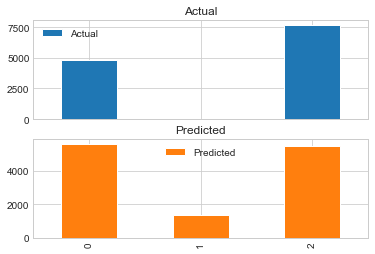

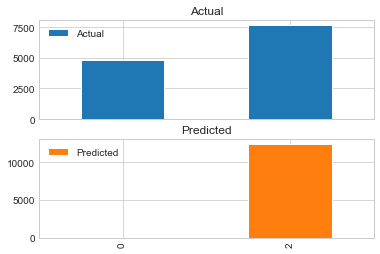

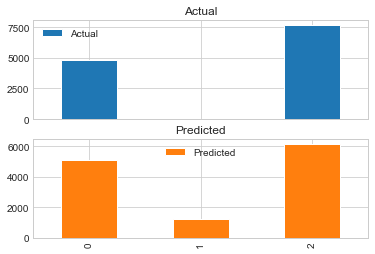

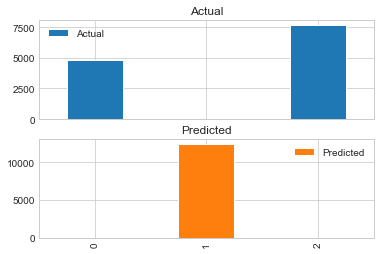

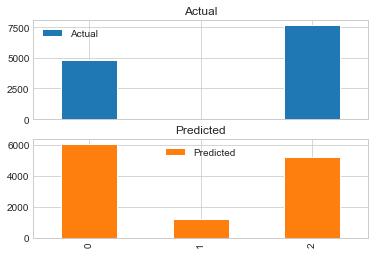

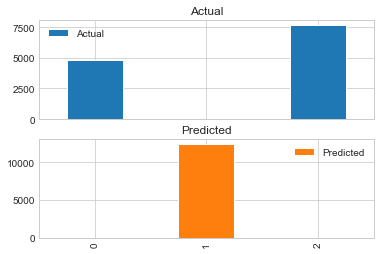

In [64]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score',
                    'micro precision', 'micro recall', 'micro f1-score',
                    'macro precision', 'macro recall', 'macro f1-score',
                    'weighted precision', 'weighted recall', 'weighted f1-score',
                    'type','Tuning']
results = list()
tuning =[True,False]
types = ['RSSI Only','Rolling Mean RSSI','Both']
criterion = selected_criterion
estimators = selected_estimator_size
depth = selected_max_depth
max_feat = selected_max_feature
min_samples_split = selected_min_samples_splith
min_samples_leaf = selected_min_samples_leaf
for feature in types:
    #Decide on type of data
    if feature == 'RSSI Only':
        trainX_data = train_X_rssi
        testX_data = test_X_rssi_home_big
    elif feature == 'Rolling Mean RSSI':
        trainX_data = train_X_rolling_mean
        testX_data = test_X_rolling_mean_home_big
    else:
        trainX_data = combination_features_X
        testX_data = test_combination_features_X_home_big
    scaler = StandardScaler()
    scaler.fit(trainX_data)
    testX_data = scaler.transform(testX_data)
    for tune in tuning:
        if tune == True:
            model = RandomForestClassifier(n_estimators=estimators,criterion=criterion,
                                                    max_features=max_feat,max_depth=depth,
                                                    min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split)  
        else: 
            model = RandomForestClassifier()
        trainX_data = scaler.transform(trainX_data)
        model.fit(trainX_data,train_Y.ravel())
        predicted = model.predict(testX_data)
        matrix = confusion_matrix(test_Y_home_big.ravel(), predicted)
        report = classification_report(test_Y_home_big.ravel(), predicted,output_dict=True)
        accuracy = accuracy_score(test_Y_home_big.ravel(),predicted)
        statistical_array = list()
        statistics = pd.DataFrame(report).transpose()
        error_dataframe = pd.DataFrame({'Actual': test_Y_home_big.flatten(), 'Predicted':predicted.flatten()})
        print("Confusion Matrix:")
        print(matrix)
        display(statistics)
        display(error_dataframe)
        error_dataframe.apply(pd.value_counts).plot(kind='bar', subplots=True)
        error = pd.DataFrame(np.where(error_dataframe['Actual'] != error_dataframe['Predicted'],1,0), columns=["error"])
        result = pd.DataFrame(train_Y,columns=["zone"]).join(error)
        data = structure_data(result,statistics['precision'].mean(),accuracy,statistics['f1-score'].mean(),statistics)
        data.append(feature)
        data.append(tune)
        results.append(data)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
final_results.append(statistics.sort_values(by=['f1-score'],ascending=False).head(1).values[0])

### Best Results - Home Testing data (using data recovered from Android 10 SAMSUNG Galaxy A71 Small Dataset)
Experiment with testing dataset

Confusion Matrix:
[[552  83 222]
 [  0   0   0]
 [219 312 896]]


C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.715953,0.644107,0.678133,857.000000
1,0.000000,0.000000,0.000000,0.000000
2,0.801431,0.627891,0.704126,1427.000000
accuracy,0.633975,0.633975,0.633975,0.633975
macro avg,0.505795,0.423999,0.460753,2284.000000
weighted avg,0.769358,0.633975,0.694373,2284.000000


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
2279,2,1
2280,2,2
2281,2,2
2282,2,1


Confusion Matrix:
[[   0  857]
 [   0 1427]]


C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,857.000000
2,0.624781,1.000000,0.769065,1427.000000
accuracy,0.624781,0.624781,0.624781,0.624781
macro avg,0.312391,0.500000,0.384532,2284.000000
weighted avg,0.390351,0.624781,0.480497,2284.000000


,Actual,Predicted
0,0,2
1,0,2
2,0,2
3,0,2
4,0,2
...,...,...
2279,2,2
2280,2,2
2281,2,2
2282,2,2


Confusion Matrix:
[[ 518   53  286]
 [   0    0    0]
 [ 160  220 1047]]


C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.764012,0.604434,0.674919,857.000000
1,0.000000,0.000000,0.000000,0.000000
2,0.785446,0.733707,0.758696,1427.000000
accuracy,0.685201,0.685201,0.685201,0.685201
macro avg,0.516486,0.446047,0.477871,2284.000000
weighted avg,0.777404,0.685201,0.727261,2284.000000


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
2279,2,1
2280,2,1
2281,2,2
2282,2,2


Confusion Matrix:
[[   0  857    0]
 [   0    0    0]
 [   0 1427    0]]


C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\DevelopmentTools\Anaconda3\lib\site-packages\

,precision,recall,f1-score,support
0,0.0,0.0,0.0,857.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1427.0
accuracy,0.0,0.0,0.0,0.0
macro avg,0.0,0.0,0.0,2284.0
weighted avg,0.0,0.0,0.0,2284.0


,Actual,Predicted
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
2279,2,1
2280,2,1
2281,2,1
2282,2,1


Confusion Matrix:
[[540  97 220]
 [  0   0   0]
 [272 283 872]]


C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.665025,0.630105,0.647094,857.000000
1,0.000000,0.000000,0.000000,0.000000
2,0.798535,0.611072,0.692338,1427.000000
accuracy,0.618214,0.618214,0.618214,0.618214
macro avg,0.487853,0.413726,0.446477,2284.000000
weighted avg,0.748439,0.618214,0.675362,2284.000000


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
2279,2,1
2280,2,2
2281,2,2
2282,2,1


Confusion Matrix:
[[   0  857    0]
 [   0    0    0]
 [   0 1427    0]]


C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\DevelopmentTools\Anaconda3\lib\site-packages\

,precision,recall,f1-score,support
0,0.0,0.0,0.0,857.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1427.0
accuracy,0.0,0.0,0.0,0.0
macro avg,0.0,0.0,0.0,2284.0
weighted avg,0.0,0.0,0.0,2284.0


,Actual,Predicted
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
2279,2,1
2280,2,1
2281,2,1
2282,2,1


,mae,mse,rmse,precision,accuracy,f1-score,micro precision,micro recall,micro f1-score,macro precision,macro recall,macro f1-score,weighted precision,weighted recall,weighted f1-score,type,Tuning
2,0.314799,0.314799,0.561069,0.588092,0.685201,0.553991,0.685201,0.685201,0.685201,0.516486,0.446047,0.477871,0.777404,0.685201,0.727261,Rolling Mean RSSI,True
0,0.366025,0.366025,0.605000,0.571085,0.633975,0.528560,0.633975,0.633975,0.633975,0.505795,0.423999,0.460753,0.769358,0.633975,0.694373,RSSI Only,True
4,0.381786,0.381786,0.617889,0.553011,0.618214,0.513248,0.618214,0.618214,0.618214,0.487853,0.413726,0.446477,0.748439,0.618214,0.675362,Both,True
1,0.375219,0.375219,0.612551,0.390461,0.624781,0.451775,0.624781,0.624781,0.624781,0.312391,0.500000,0.384532,0.390351,0.624781,0.480497,RSSI Only,False
3,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Rolling Mean RSSI,False
5,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Both,False


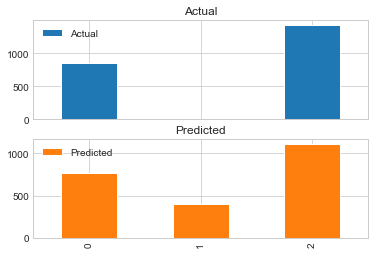

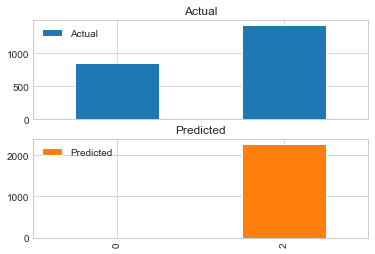

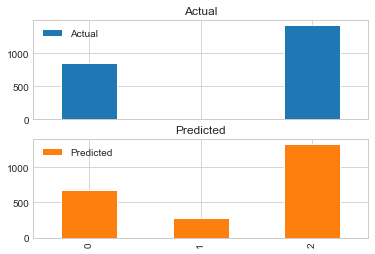

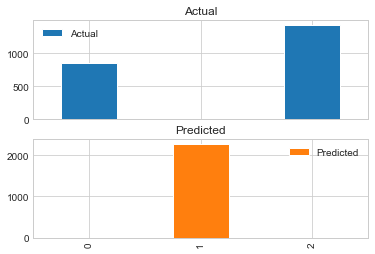

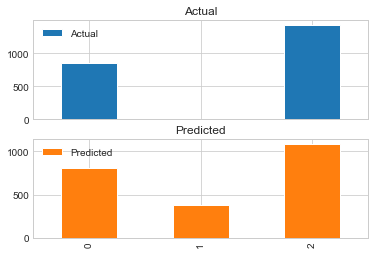

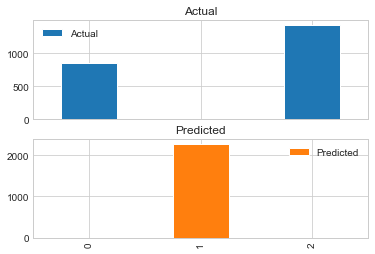

In [65]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score',
                    'micro precision', 'micro recall', 'micro f1-score',
                    'macro precision', 'macro recall', 'macro f1-score',
                    'weighted precision', 'weighted recall', 'weighted f1-score',
                    'type','Tuning']
results = list()
tuning =[True,False]
types = ['RSSI Only','Rolling Mean RSSI','Both']
criterion = selected_criterion
estimators = selected_estimator_size
depth = selected_max_depth
max_feat = selected_max_feature
min_samples_split = selected_min_samples_splith
min_samples_leaf = selected_min_samples_leaf
for feature in types:
    #Decide on type of data
    if feature == 'RSSI Only':
        trainX_data = train_X_rssi
        testX_data = test_X_rssi_home_small
    elif feature == 'Rolling Mean RSSI':
        trainX_data = train_X_rolling_mean
        testX_data = test_X_rolling_mean_home_small
    else:
        trainX_data = combination_features_X
        testX_data = test_combination_features_X_home_small
    scaler = StandardScaler()
    scaler.fit(trainX_data)
    testX_data = scaler.transform(testX_data)
    for tune in tuning:
        if tune == True:
            model = RandomForestClassifier(n_estimators=estimators,criterion=criterion,
                                                    max_features=max_feat,max_depth=depth,
                                                    min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split)  
        else: 
            model = RandomForestClassifier()
        trainX_data = scaler.transform(trainX_data)
        model.fit(trainX_data,train_Y.ravel())
        predicted = model.predict(testX_data)
        matrix = confusion_matrix(test_Y_home_small.ravel(), predicted)
        report = classification_report(test_Y_home_small.ravel(), predicted,output_dict=True)
        accuracy = accuracy_score(test_Y_home_small.ravel(),predicted)
        statistical_array = list()
        statistics = pd.DataFrame(report).transpose()
        error_dataframe = pd.DataFrame({'Actual': test_Y_home_small.flatten(), 'Predicted':predicted.flatten()})
        print("Confusion Matrix:")
        print(matrix)
        display(statistics)
        display(error_dataframe)
        error_dataframe.apply(pd.value_counts).plot(kind='bar', subplots=True)
        error = pd.DataFrame(np.where(error_dataframe['Actual'] != error_dataframe['Predicted'],1,0), columns=["error"])
        result = pd.DataFrame(train_Y,columns=["zone"]).join(error)
        data = structure_data(result,statistics['precision'].mean(),accuracy,statistics['f1-score'].mean(),statistics)
        data.append(feature)
        data.append(tune)
        results.append(data)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
final_results.append(statistics.sort_values(by=['f1-score'],ascending=False).head(1).values[0])

### Best Results - Home Testing data (using data recovered from ASUS ZENFONE LIVE)
Experiment with testing dataset

Confusion Matrix:
[[100   5  51]
 [  0   0   0]
 [ 35  61 163]]


C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.740741,0.641026,0.687285,156.000000
1,0.000000,0.000000,0.000000,0.000000
2,0.761682,0.629344,0.689218,259.000000
accuracy,0.633735,0.633735,0.633735,0.633735
macro avg,0.500808,0.423456,0.458834,415.000000
weighted avg,0.753810,0.633735,0.688491,415.000000


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
410,2,2
411,2,2
412,2,1
413,2,2


Confusion Matrix:
[[  0 156]
 [  0 259]]


C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,156.000000
2,0.624096,1.000000,0.768546,259.000000
accuracy,0.624096,0.624096,0.624096,0.624096
macro avg,0.312048,0.500000,0.384273,415.000000
weighted avg,0.389496,0.624096,0.479647,415.000000


,Actual,Predicted
0,0,2
1,0,2
2,0,2
3,0,2
4,0,2
...,...,...
410,2,2
411,2,2
412,2,2
413,2,2


Confusion Matrix:
[[ 96   4  56]
 [  0   0   0]
 [ 10  46 203]]


C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.905660,0.615385,0.732824,156.000000
1,0.000000,0.000000,0.000000,0.000000
2,0.783784,0.783784,0.783784,259.000000
accuracy,0.720482,0.720482,0.720482,0.720482
macro avg,0.563148,0.466389,0.505536,415.000000
weighted avg,0.829598,0.720482,0.764628,415.000000


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
410,2,1
411,2,2
412,2,2
413,2,2


Confusion Matrix:
[[  0 156   0]
 [  0   0   0]
 [  0 259   0]]


C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\DevelopmentTools\Anaconda3\lib\site-packages\

,precision,recall,f1-score,support
0,0.0,0.0,0.0,156.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,259.0
accuracy,0.0,0.0,0.0,0.0
macro avg,0.0,0.0,0.0,415.0
weighted avg,0.0,0.0,0.0,415.0


,Actual,Predicted
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
410,2,1
411,2,1
412,2,1
413,2,1


Confusion Matrix:
[[103   6  47]
 [  0   0   0]
 [ 36  52 171]]


C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.741007,0.660256,0.698305,156.000000
1,0.000000,0.000000,0.000000,0.000000
2,0.784404,0.660232,0.716981,259.000000
accuracy,0.660241,0.660241,0.660241,0.660241
macro avg,0.508470,0.440163,0.471762,415.000000
weighted avg,0.768091,0.660241,0.709961,415.000000


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
410,2,2
411,2,1
412,2,1
413,2,2


Confusion Matrix:
[[  0 156   0]
 [  0   0   0]
 [  0 259   0]]


C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\DevelopmentTools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\DevelopmentTools\Anaconda3\lib\site-packages\

,precision,recall,f1-score,support
0,0.0,0.0,0.0,156.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,259.0
accuracy,0.0,0.0,0.0,0.0
macro avg,0.0,0.0,0.0,415.0
weighted avg,0.0,0.0,0.0,415.0


,Actual,Predicted
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
410,2,1
411,2,1
412,2,1
413,2,1


,mae,mse,rmse,precision,accuracy,f1-score,micro precision,micro recall,micro f1-score,macro precision,macro recall,macro f1-score,weighted precision,weighted recall,weighted f1-score,type,Tuning
2,0.279518,0.279518,0.528695,0.633779,0.720482,0.584542,0.720482,0.720482,0.720482,0.563148,0.466389,0.505536,0.829598,0.720482,0.764628,Rolling Mean RSSI,True
4,0.339759,0.339759,0.582889,0.577035,0.660241,0.542875,0.660241,0.660241,0.660241,0.508470,0.440163,0.471762,0.768091,0.660241,0.709961,Both,True
0,0.366265,0.366265,0.605198,0.565129,0.633735,0.526261,0.633735,0.633735,0.633735,0.500808,0.423456,0.458834,0.753810,0.633735,0.688491,RSSI Only,True
1,0.375904,0.375904,0.613110,0.389947,0.624096,0.451312,0.624096,0.624096,0.624096,0.312048,0.500000,0.384273,0.389496,0.624096,0.479647,RSSI Only,False
3,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Rolling Mean RSSI,False
5,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Both,False


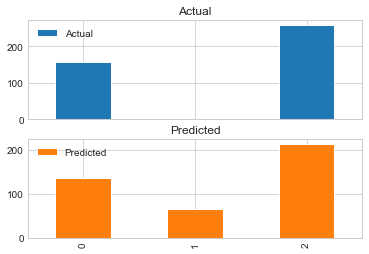

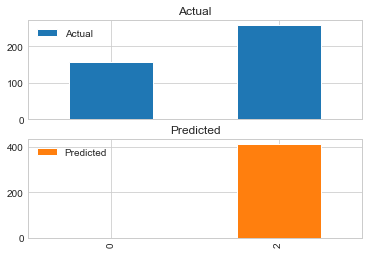

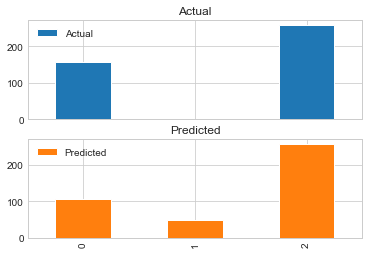

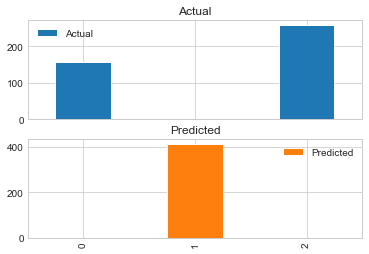

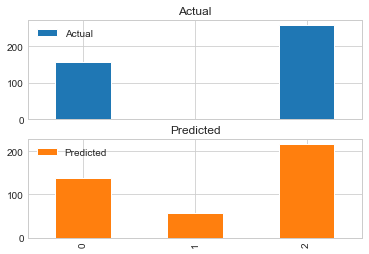

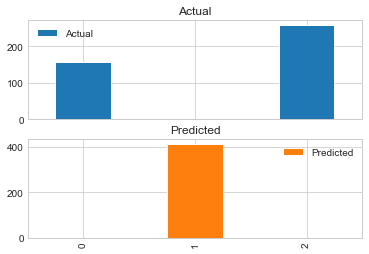

In [66]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score',
                    'micro precision', 'micro recall', 'micro f1-score',
                    'macro precision', 'macro recall', 'macro f1-score',
                    'weighted precision', 'weighted recall', 'weighted f1-score',
                    'type','Tuning']
results = list()
tuning =[True,False]
types = ['RSSI Only','Rolling Mean RSSI','Both']
criterion = selected_criterion
estimators = selected_estimator_size
depth = selected_max_depth
max_feat = selected_max_feature
min_samples_split = selected_min_samples_splith
min_samples_leaf = selected_min_samples_leaf
for feature in types:
    #Decide on type of data
    if feature == 'RSSI Only':
        trainX_data = train_X_rssi
        testX_data = test_X_rssi_home_asus
    elif feature == 'Rolling Mean RSSI':
        trainX_data = train_X_rolling_mean
        testX_data = test_X_rolling_mean_home_asus
    else:
        trainX_data = combination_features_X
        testX_data = test_combination_features_X_home_asus
    scaler = StandardScaler()
    scaler.fit(trainX_data)
    testX_data = scaler.transform(testX_data)
    for tune in tuning:
        if tune == True:
            model = RandomForestClassifier(n_estimators=estimators,criterion=criterion,
                                                    max_features=max_feat,max_depth=depth,
                                                    min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split)  
        else: 
            model = RandomForestClassifier()
        trainX_data = scaler.transform(trainX_data)
        model.fit(trainX_data,train_Y.ravel())
        predicted = model.predict(testX_data)
        matrix = confusion_matrix(test_Y_home_asus.ravel(), predicted)
        report = classification_report(test_Y_home_asus.ravel(), predicted,output_dict=True)
        accuracy = accuracy_score(test_Y_home_asus.ravel(),predicted)
        statistical_array = list()
        statistics = pd.DataFrame(report).transpose()
        error_dataframe = pd.DataFrame({'Actual': test_Y_home_asus.flatten(), 'Predicted':predicted.flatten()})
        print("Confusion Matrix:")
        print(matrix)
        display(statistics)
        display(error_dataframe)
        error_dataframe.apply(pd.value_counts).plot(kind='bar', subplots=True)
        error = pd.DataFrame(np.where(error_dataframe['Actual'] != error_dataframe['Predicted'],1,0), columns=["error"])
        result = pd.DataFrame(train_Y,columns=["zone"]).join(error)
        data = structure_data(result,statistics['precision'].mean(),accuracy,statistics['f1-score'].mean(),statistics)
        data.append(feature)
        data.append(tune)
        results.append(data)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
final_results.append(statistics.sort_values(by=['f1-score'],ascending=False).head(1).values[0])

### Results Display

,mae,mse,rmse,precision,accuracy,f1-score,micro precision,micro recall,micro f1-score,macro precision,macro recall,macro f1-score,weighted precision,weighted recall,weighted f1-score,type,Tuning
0,0.219247,0.219247,0.468238,0.782934,0.780753,0.765214,0.780753,0.780753,0.780753,0.782356,0.742157,0.757757,0.787430,0.780753,0.779502,Both,None
2,0.223727,0.223727,0.472998,0.654120,0.776273,0.629235,0.776273,0.776273,0.776273,0.570645,0.528503,0.546083,0.865869,0.776273,0.814802,Rolling Mean RSSI,True
4,0.279518,0.279518,0.528695,0.633779,0.720482,0.584542,0.720482,0.720482,0.720482,0.563148,0.466389,0.505536,0.829598,0.720482,0.764628,Rolling Mean RSSI,True
1,0.358444,0.358444,0.598702,0.564178,0.641556,0.560269,0.641556,0.641556,0.641556,0.538613,0.556433,0.529233,0.589059,0.641556,0.603129,Rolling Mean RSSI,True
3,0.314799,0.314799,0.561069,0.588092,0.685201,0.553991,0.685201,0.685201,0.685201,0.516486,0.446047,0.477871,0.777404,0.685201,0.727261,Rolling Mean RSSI,True


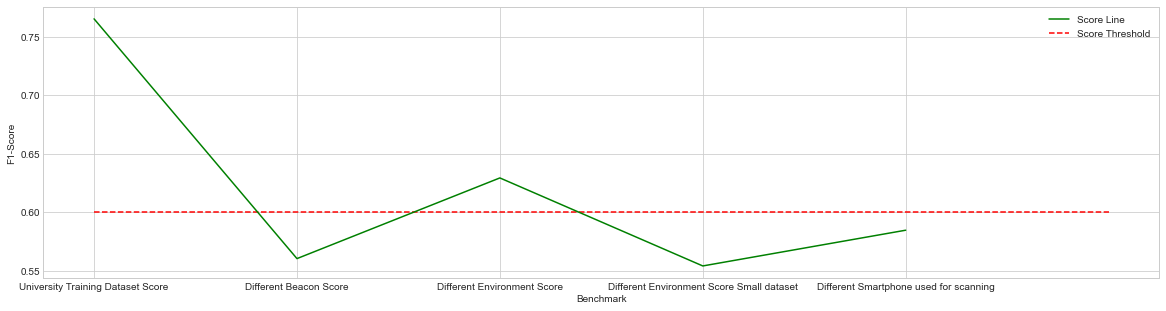

In [67]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score',
                    'micro precision', 'micro recall', 'micro f1-score',
                    'macro precision', 'macro recall', 'macro f1-score',
                    'weighted precision', 'weighted recall', 'weighted f1-score',
                    'type','Tuning']
types = ['University Training Dataset Score','Different Beacon Score','Different Environment Score','Different Environment Score Small dataset',
        "Different Smartphone used for scanning"]
results = pd.DataFrame(data=final_results,columns=statistical_cols)
display(results.sort_values(by=['f1-score'],ascending=False))
plt.figure(figsize=(20,5))
plt.plot(types,results['f1-score'],color='green',label='Score Line')
plt.hlines(0.6,0,5,color='red',label='Score Threshold',linestyles='dashed')
plt.xlabel('Benchmark')
plt.ylabel('F1-Score')
plt.legend(loc='upper right');
plt.show()